Utilizando uma base de dados real, o objetivo desse desafio é predizer os valores de ações do Banco do Brasil, Itaú, Petrobras e Vale, para tomda de decisão de compra/venda de ações.


## Coleta dos dados**

In [1]:
!pip install pandas_datareader

   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/109.5 kB 330.3 kB/s eta 0:00:01
   --------------------- ----------------- 61.4/109.5 kB 469.7 kB/s eta 0:00:01
   -------------------------------------- 109.5/109.5 kB 708.7 kB/s eta 0:00:00


In [2]:
!pip install yfinance
!pip install fix_yahoo_finance

     ---------------------------------------- 0.0/314.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/314.6 kB ? eta -:--:--
     ---- -------------------------------- 41.0/314.6 kB 653.6 kB/s eta 0:00:01
     ----------------------- -------------- 194.6/314.6 kB 1.7 MB/s eta 0:00:01
     -------------------------------------  307.2/314.6 kB 2.1 MB/s eta 0:00:01
     -------------------------------------- 314.6/314.6 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---- ----------------------------------- 0.3/3.0 MB 6.1 MB/s eta 0:00:01
     ------- -------------------------------- 0.6/3.0 

In [5]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()

acoes = ['PETR4.SA', 'VALE3.SA', 'BBAS3.SA', 'ITUB4.SA']

df = pdr.get_data_yahoo(acoes, start="2021-01-01", end="2022-08-31")

[*********************100%%**********************]  4 of 4 completed



## Dicionário e estrutura do conjunto de dados**


- Open: Valor de abertura dos papeis das ações das empresas Petrobras, Vale, Banco do Brasil e Itaú.

- High: Valor máximo dos papeis das ações das empresas Petrobras, Vale, Banco do Brasil e Itaú.

- Low: Valor mínimo dos papeis das ações das empresas Petrobras, Vale, Banco do Brasil e Itaú.

- Close: Valor de fechamento dos papeis das ações das empresas Petrobras, Vale, Banco do Brasil e Itaú.

- Adj Close: Valor fechamento ajustado dos papeis das ações das empresas Petrobras, Vale, Banco do Brasil e Itaú.

- Volume: Volume de negociação dos papeis das ações das empresas Petrobras, Vale, Banco do Brasil e Itaú.

In [6]:
df.head()

Price       Adj Close                                       Close             \
Ticker       BBAS3.SA   ITUB4.SA   PETR4.SA   VALE3.SA   BBAS3.SA   ITUB4.SA   
Date                                                                           
2021-01-04  29.749987  26.479340  11.359621  63.861286  37.590000  30.900000   
2021-01-05  29.441322  26.307947  11.803635  64.936562  37.200001  30.700001   
2021-01-06  30.114044  27.079193  11.827209  67.066208  38.049999  31.600000   
2021-01-07  31.309099  28.133232  12.180846  71.444199  39.560001  32.830002   
2021-01-08  31.491144  28.124645  12.228001  71.220749  39.790001  32.820000   

Price                                   High             ...        Low  \
Ticker       PETR4.SA    VALE3.SA   BBAS3.SA   ITUB4.SA  ...   PETR4.SA   
Date                                                     ...              
2021-01-04  28.910000   91.459999  39.290001  31.990000  ...  28.530001   
2021-01-05  30.040001   93.000000  37.450001  31.059999  ...  28.240000   
2021-01-06  30.100000   96.050003  38.730000  32.060001  ...  30.049999   
2021-01-07  31.000000  102.320000  39.700001  33.060001  ...  30.340000   
2021-01-08  31.120001  102.000000  40.560001  33.439999  ...  30.350000   

Price                       Open                                    Volume  \
Ticker       VALE3.SA   BBAS3.SA ITUB4.SA   PETR4.SA    VALE3.SA  BBAS3.SA   
Date                                                                         
2021-01-04  88.849998  39.230000    31.98  28.650000   89.349998  13874600   
2021-01-05  90.519997  37.450001    30.73  28.900000   91.459999  15954000   
2021-01-06  94.400002  37.529999    30.98  30.160000   94.980003  20566700   
2021-01-07  96.610001  38.119999    31.65  30.340000   96.610001  21878700   
2021-01-08  98.199997  39.849998    32.93  31.459999  103.010002  16240300   

Price                                     
Ticker      ITUB4.SA  PETR4.SA  VALE3.SA  
Date                                      
2021-01-04  31347800  74719700  37865500  
2021-01-05  28249800  95181100  34300300  
2021-01-06  43061900  96562500  53722500  
2021-01-07  46129800  56171300  74541400  
2021-01-08  52532500  67136300  58562700  

[5 rows x 24 columns]

## Análise descritiva univariada das séries

In [7]:
dados = df['Close']
dados.head()

Ticker,BBAS3.SA,ITUB4.SA,PETR4.SA,VALE3.SA
Date,,,,
2021-01-04,37.590000,30.900000,28.910000,91.459999
2021-01-05,37.200001,30.700001,30.040001,93.000000
2021-01-06,38.049999,31.600000,30.100000,96.050003
2021-01-07,39.560001,32.830002,31.000000,102.320000
2021-01-08,39.790001,32.820000,31.120001,102.000000


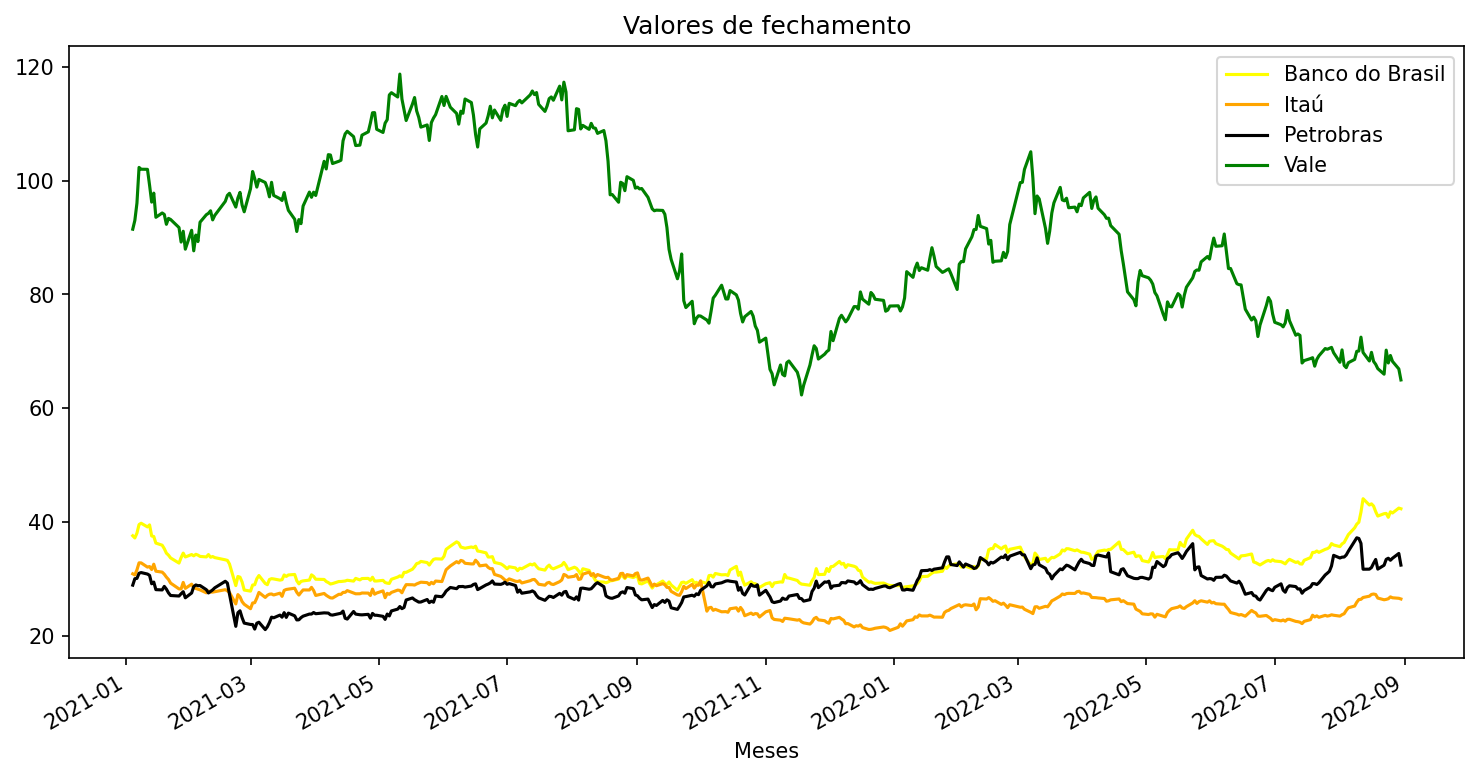

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
  
# %matplotlib inline: only draw static
# images in the notebook
%matplotlib inline

# to set the plot size
plt.figure(figsize=(12, 6), dpi=150)
  
dados['BBAS3.SA'].plot(label='Banco do Brasil', color='yellow')
dados['ITUB4.SA'].plot(label='Itaú', color='orange')
dados['PETR4.SA'].plot(label='Petrobras', color='black')
dados['VALE3.SA'].plot(label='Vale', color='green')

# adding title to the plot
plt.title('Valores de fechamento')
  
# adding Label to the x-axis
plt.xlabel('Meses')
  
# adding legend to the curve
plt.legend()

In [10]:
dados.describe()

Ticker,BBAS3.SA,ITUB4.SA,PETR4.SA,VALE3.SA
count,414.000000,414.000000,414.000000,414.000000
mean,32.735628,26.552126,28.762077,90.279928
std,3.135555,2.943132,3.227806,14.767161
min,27.860001,20.950001,21.100000,62.330002
25%,30.010000,24.007500,26.842500,77.852499
50%,32.455000,26.545000,28.660000,90.840000
75%,34.657500,28.877500,31.115001,100.314999
max,44.099998,33.290001,37.230000,118.720001


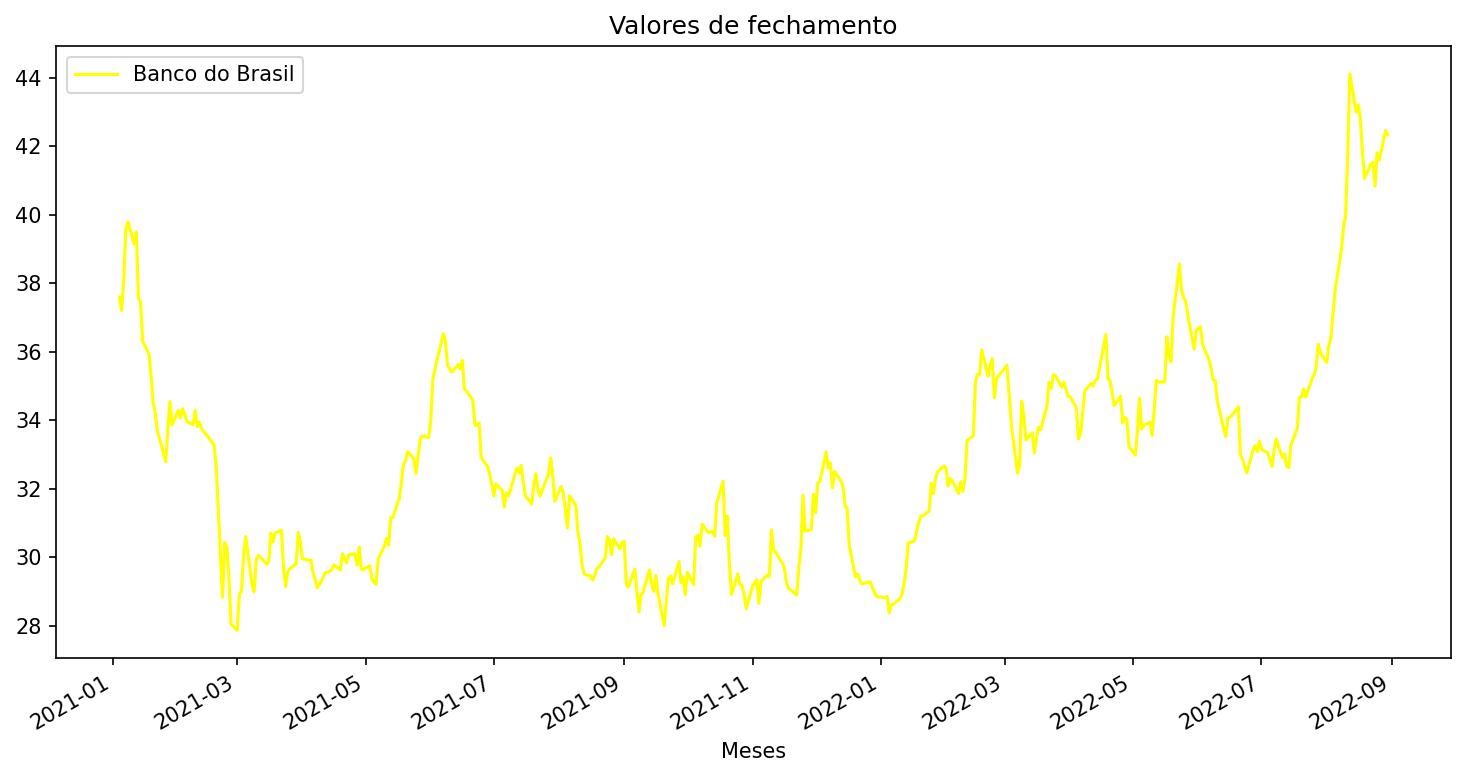

In [11]:
# ------------------
# BANCO DO BRASIL
# ------------------

# to set the plot size
plt.figure(figsize=(12, 6), dpi=150)
  
dados['BBAS3.SA'].plot(label='Banco do Brasil', color='yellow')

# adding title to the plot
plt.title('Valores de fechamento')
  
# adding Label to the x-axis
plt.xlabel('Meses')
  
# adding legend to the curve
plt.legend()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

<Figure size 640x480 with 0 Axes>

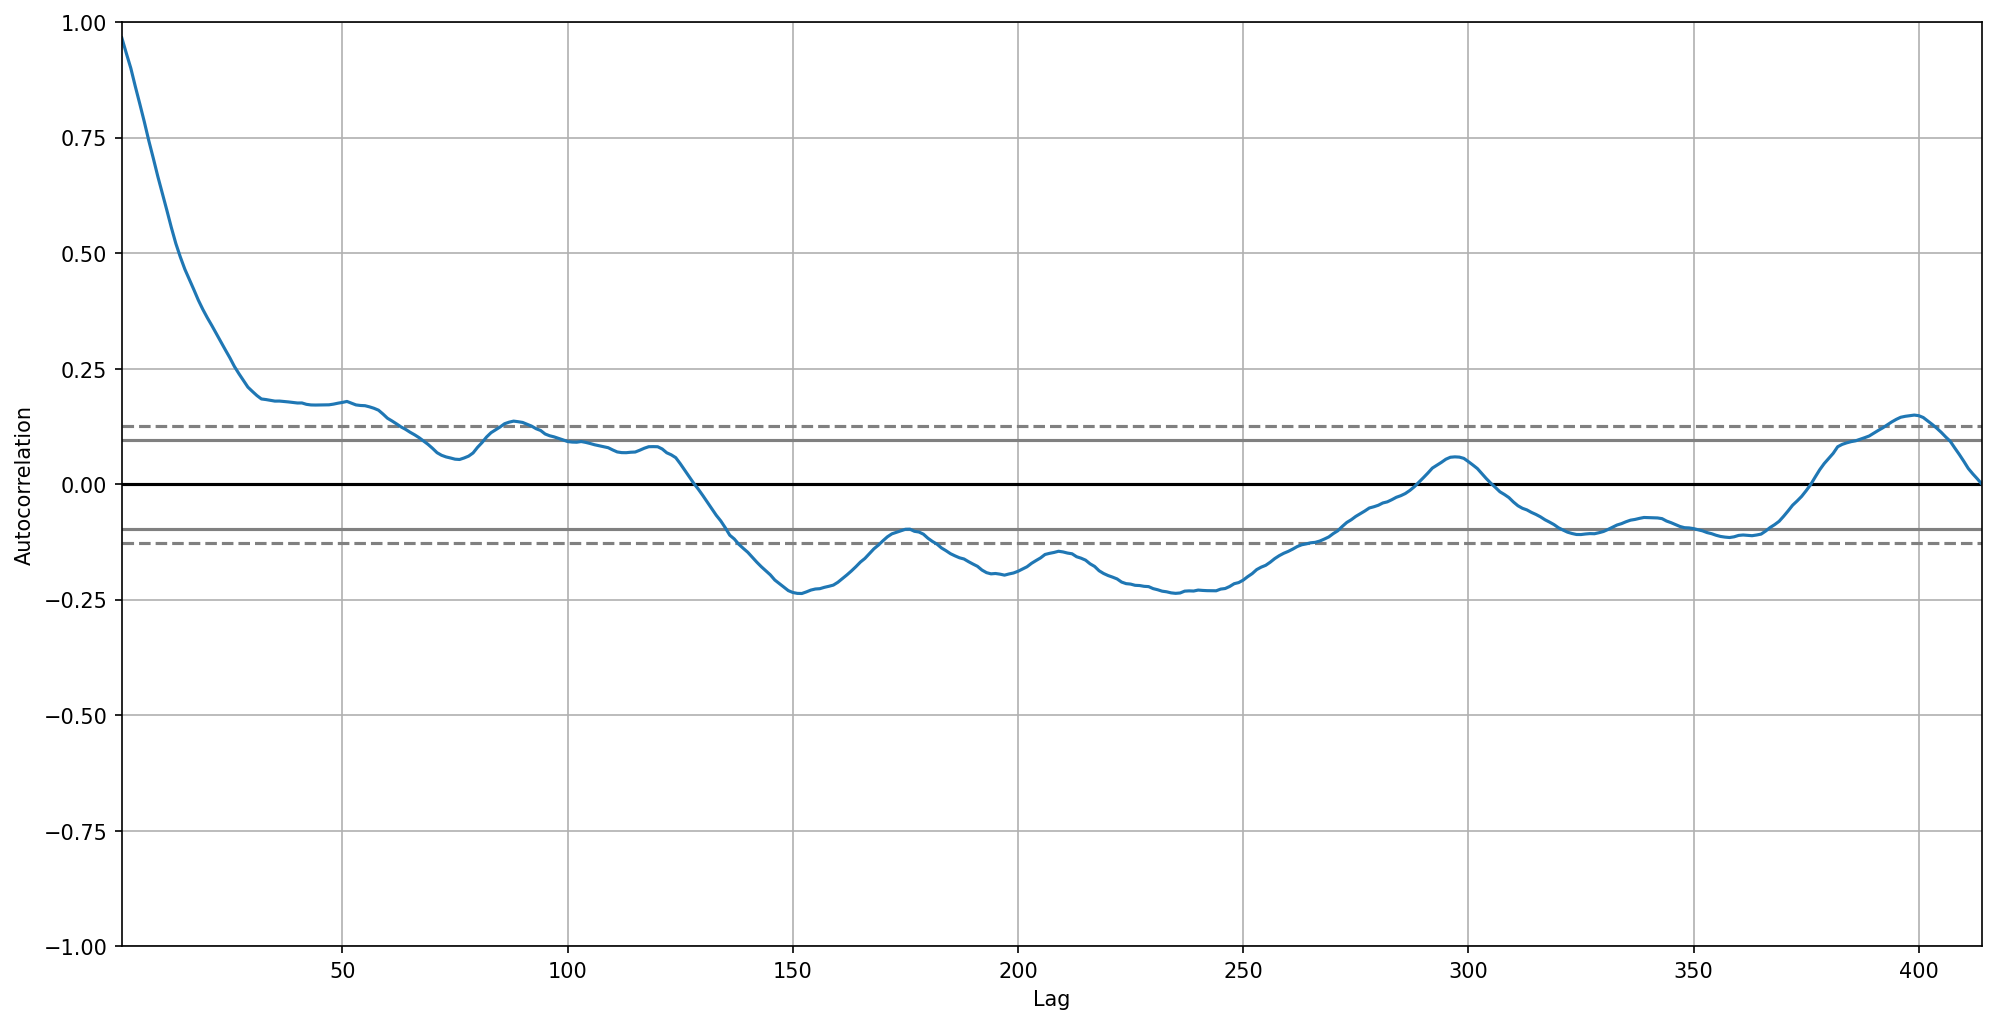

In [12]:
# ------------------
# BANCO DO BRASIL - AUTOCORRELAÇÃO
# ------------------

from pandas.plotting import autocorrelation_plot
plt.figure()

plt.figure(figsize=(16, 8), dpi=150)
autocorrelation_plot(dados['BBAS3.SA'])

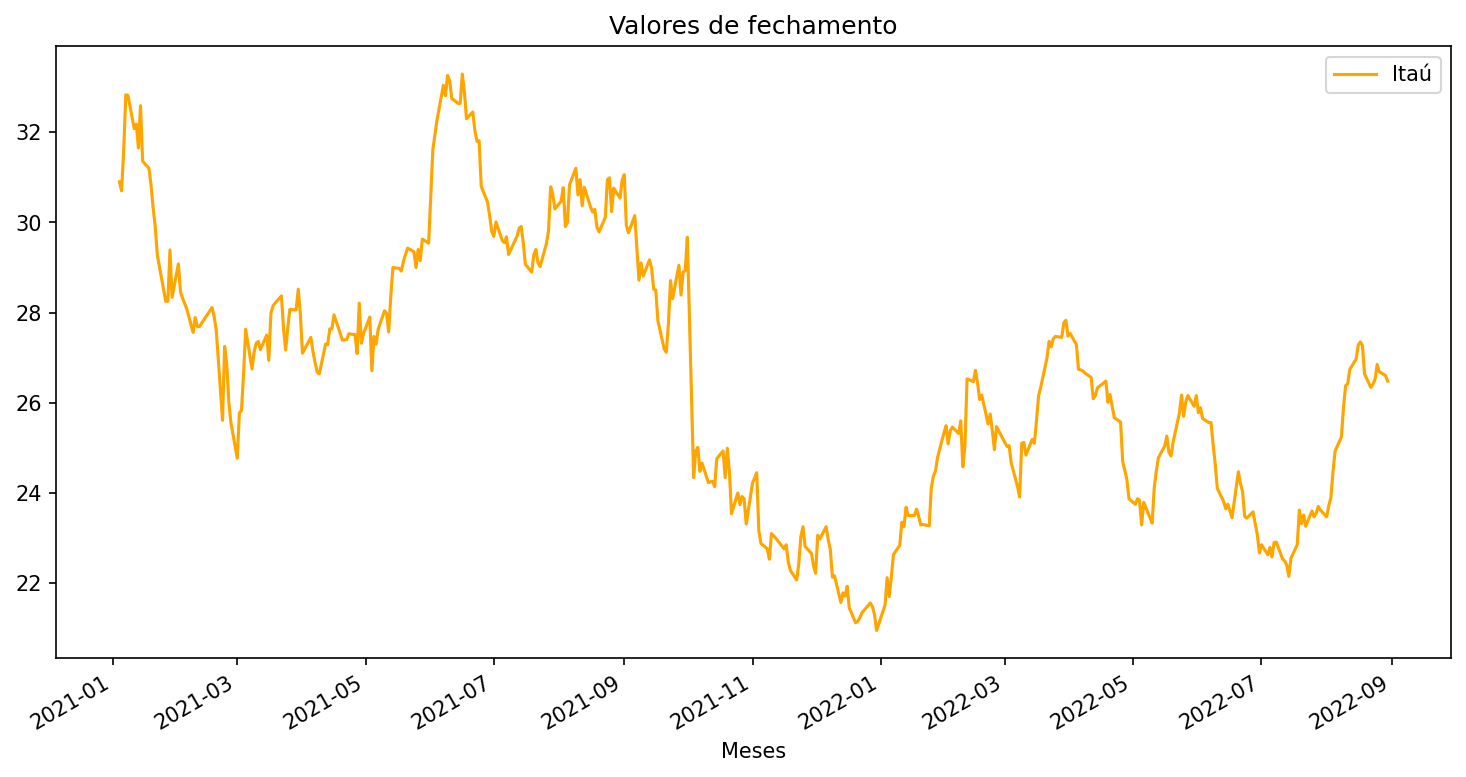

In [14]:
# ------------------
# ITAÚ
# ------------------

# to set the plot size
plt.figure(figsize=(12, 6), dpi=150)
  
dados['ITUB4.SA'].plot(label='Itaú', color='orange')

# adding title to the plot
plt.title('Valores de fechamento')
  
# adding Label to the x-axis
plt.xlabel('Meses')
  
# adding legend to the curve
plt.legend()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

<Figure size 640x480 with 0 Axes>

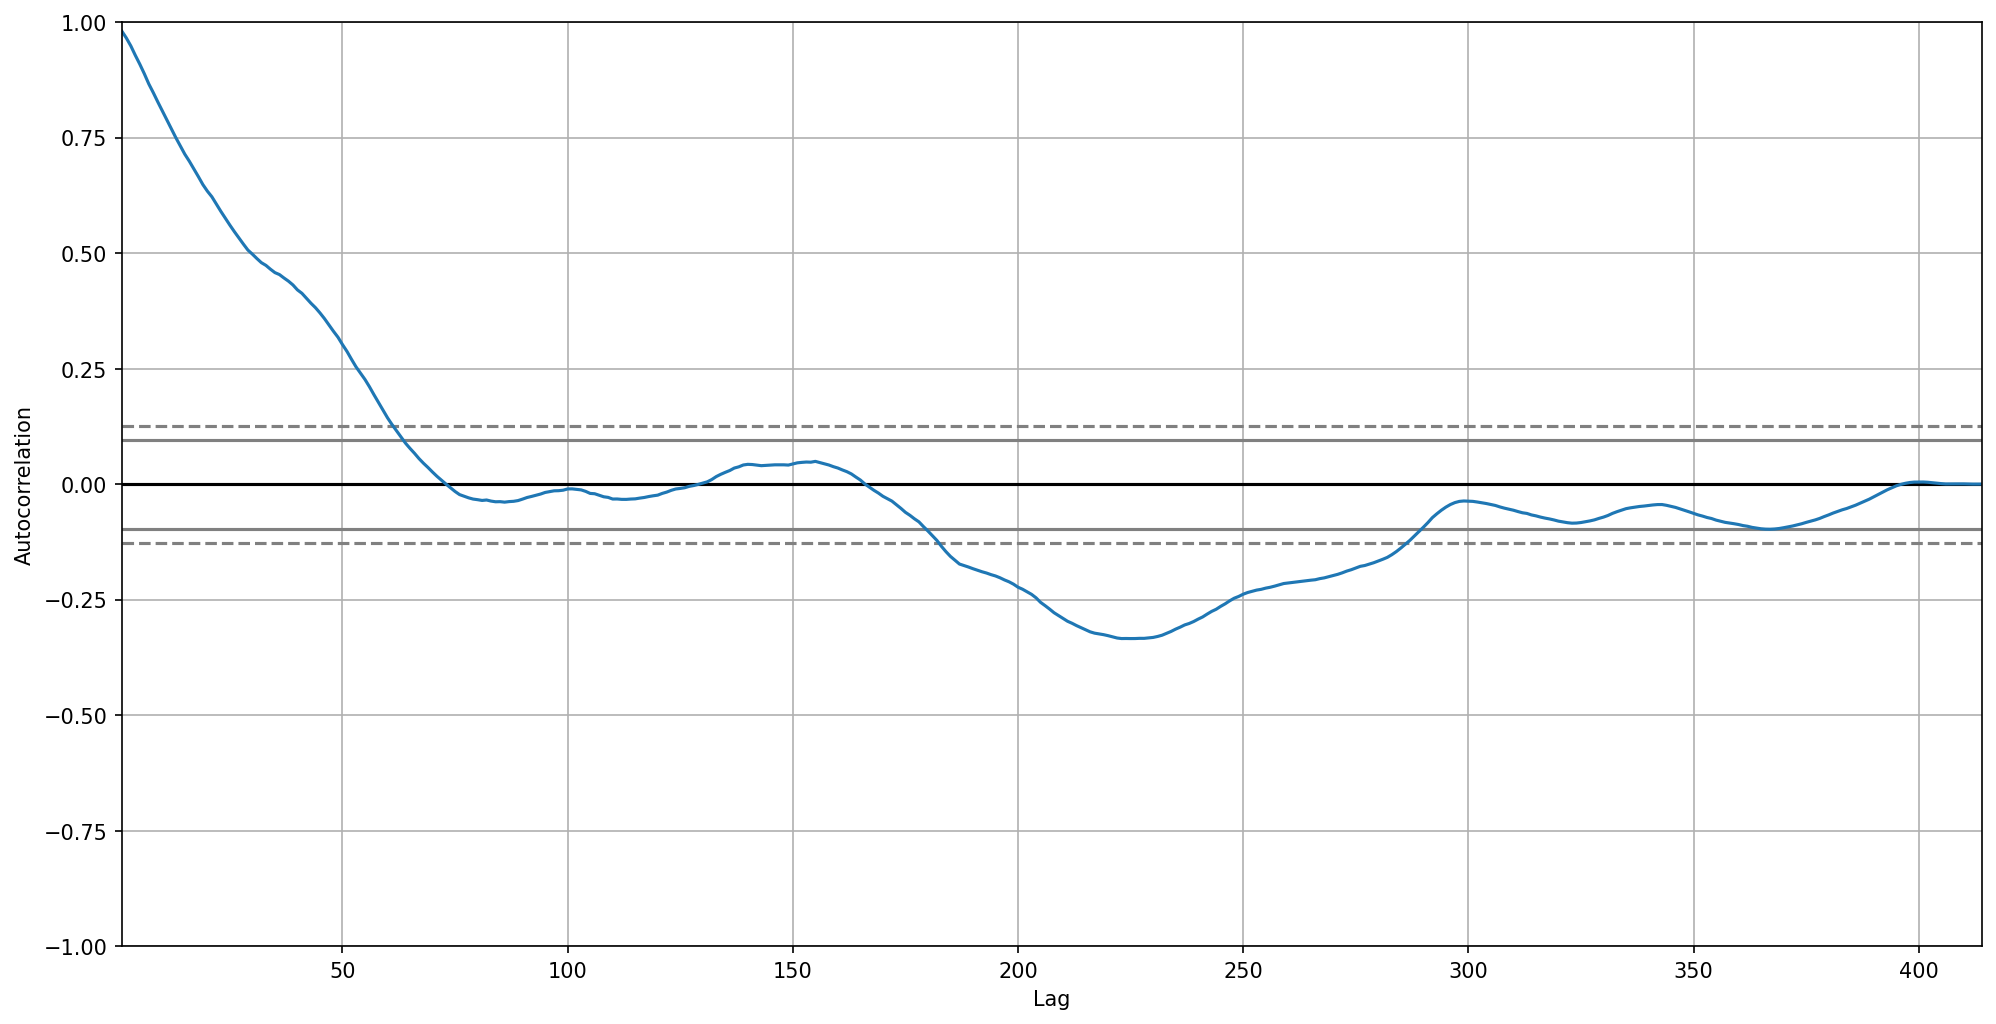

In [15]:
# ------------------
# ITAÚ - AUTOCORRELAÇÃO
# ------------------

from pandas.plotting import autocorrelation_plot
plt.figure()

plt.figure(figsize=(16, 8), dpi=150)
autocorrelation_plot(dados['ITUB4.SA'])

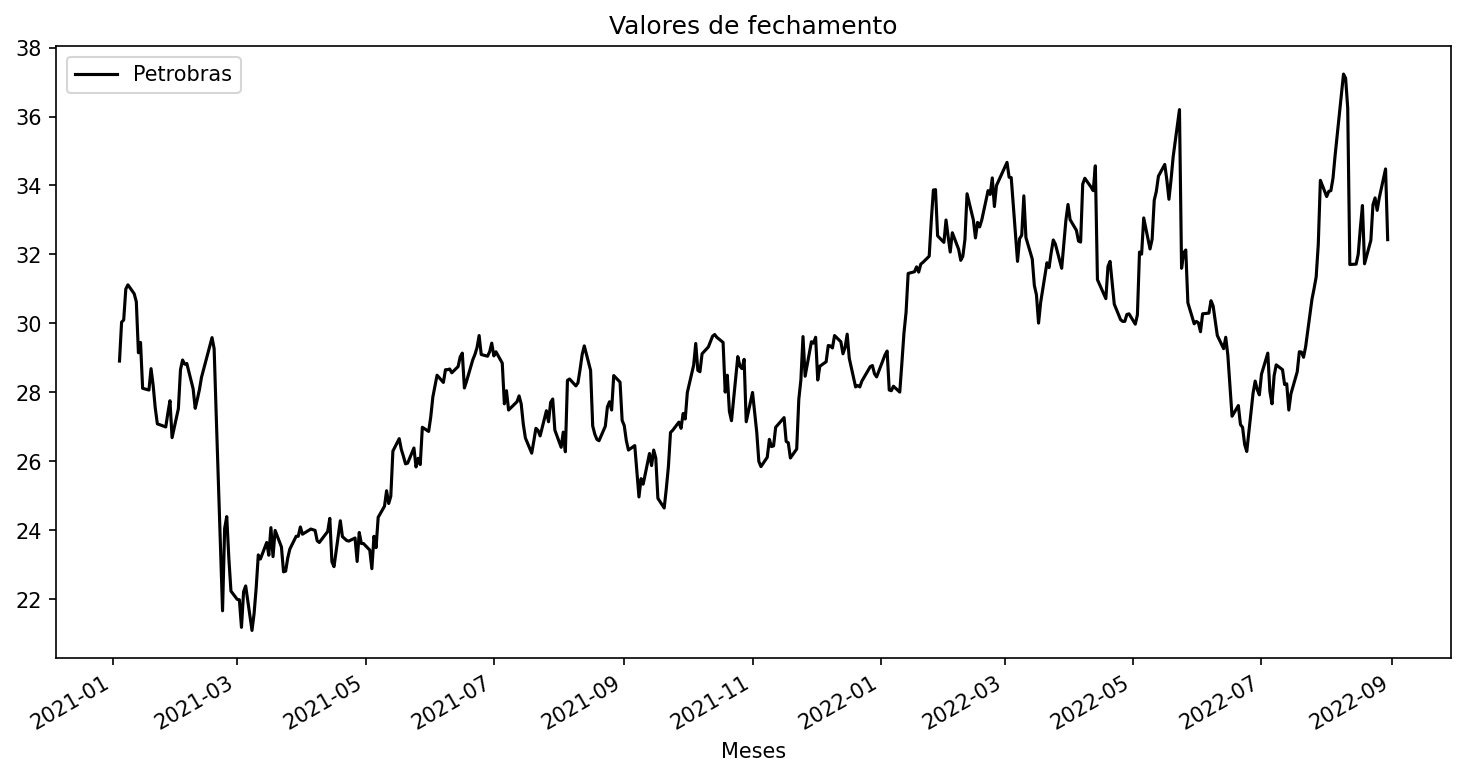

In [17]:
# ------------------
# PETROBRAS
# ------------------

# to set the plot size
plt.figure(figsize=(12, 6), dpi=150)
  
dados['PETR4.SA'].plot(label='Petrobras', color='black')

# adding title to the plot
plt.title('Valores de fechamento')
  
# adding Label to the x-axis
plt.xlabel('Meses')
  
# adding legend to the curve
plt.legend()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

<Figure size 640x480 with 0 Axes>

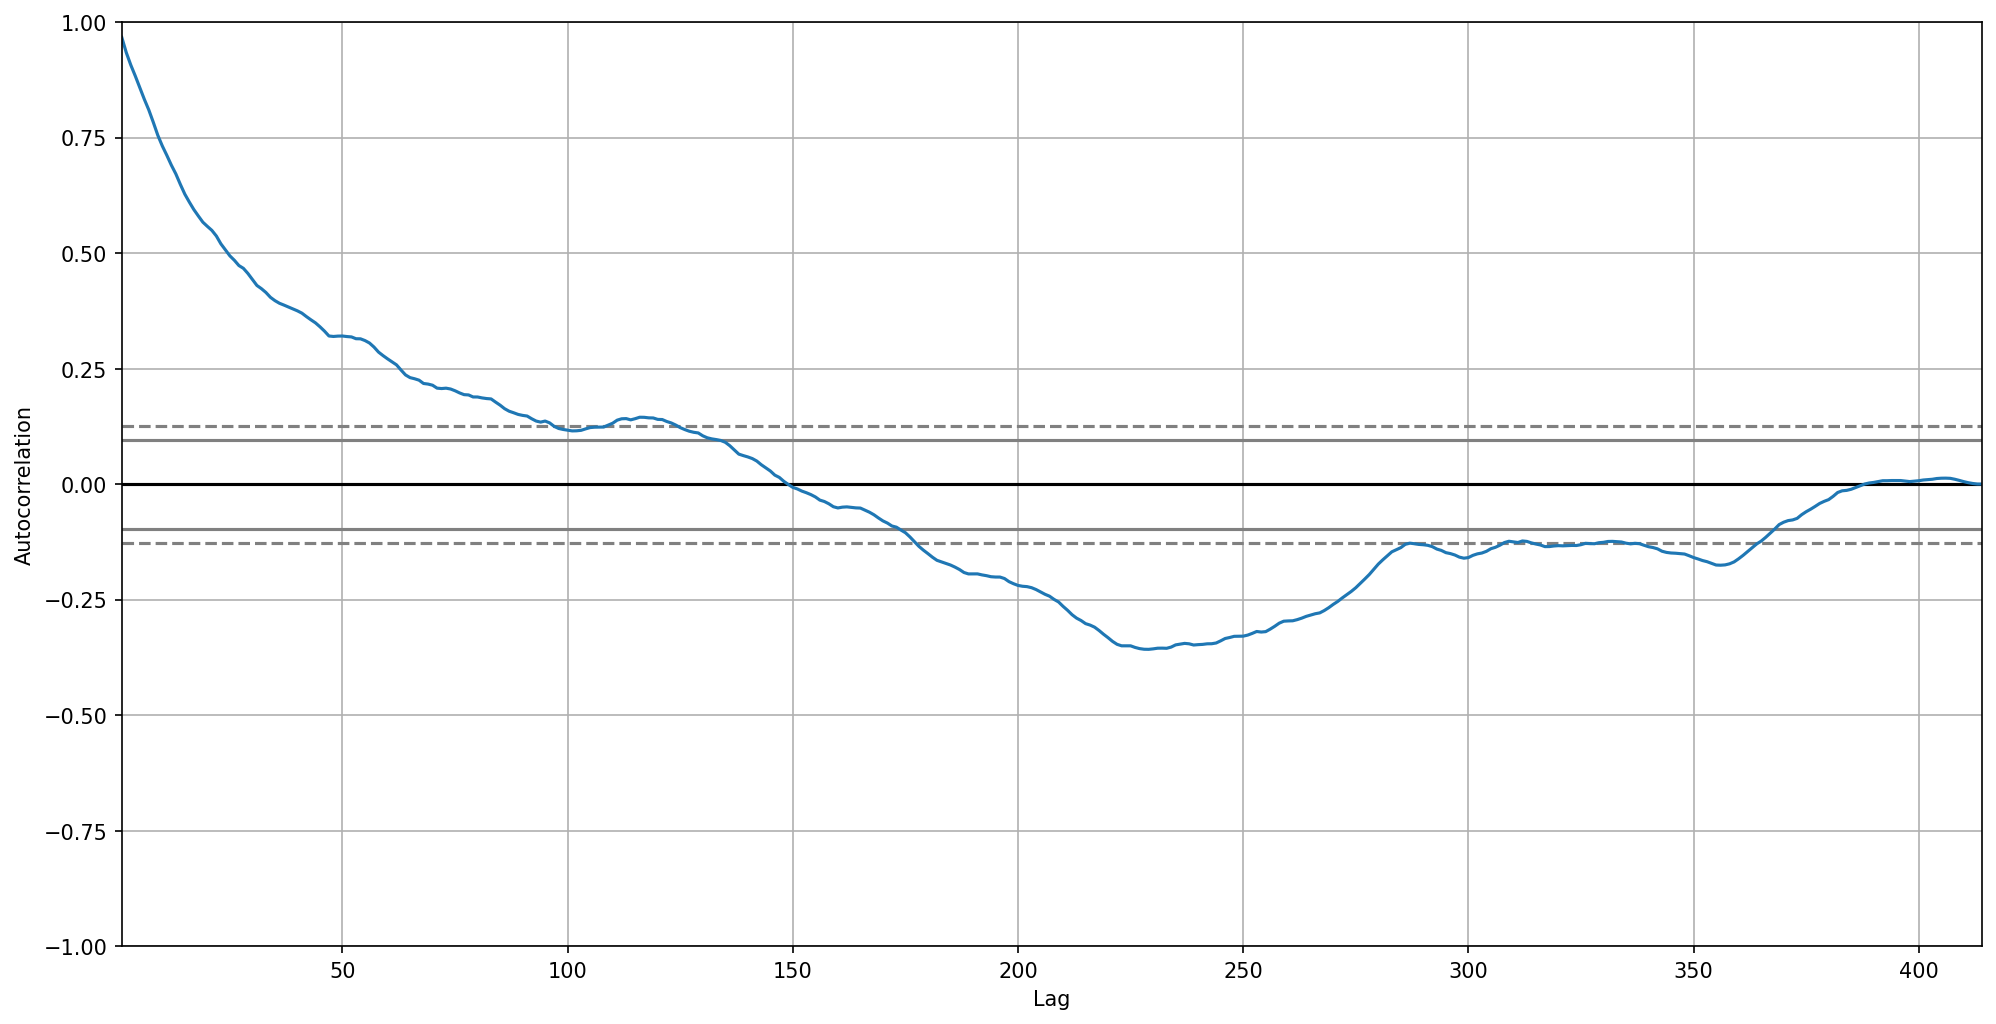

In [18]:
# ------------------
# PETROBRAS - AUTOCORRELAÇÃO
# ------------------

from pandas.plotting import autocorrelation_plot
plt.figure()

plt.figure(figsize=(16, 8), dpi=150)
autocorrelation_plot(dados['PETR4.SA'])

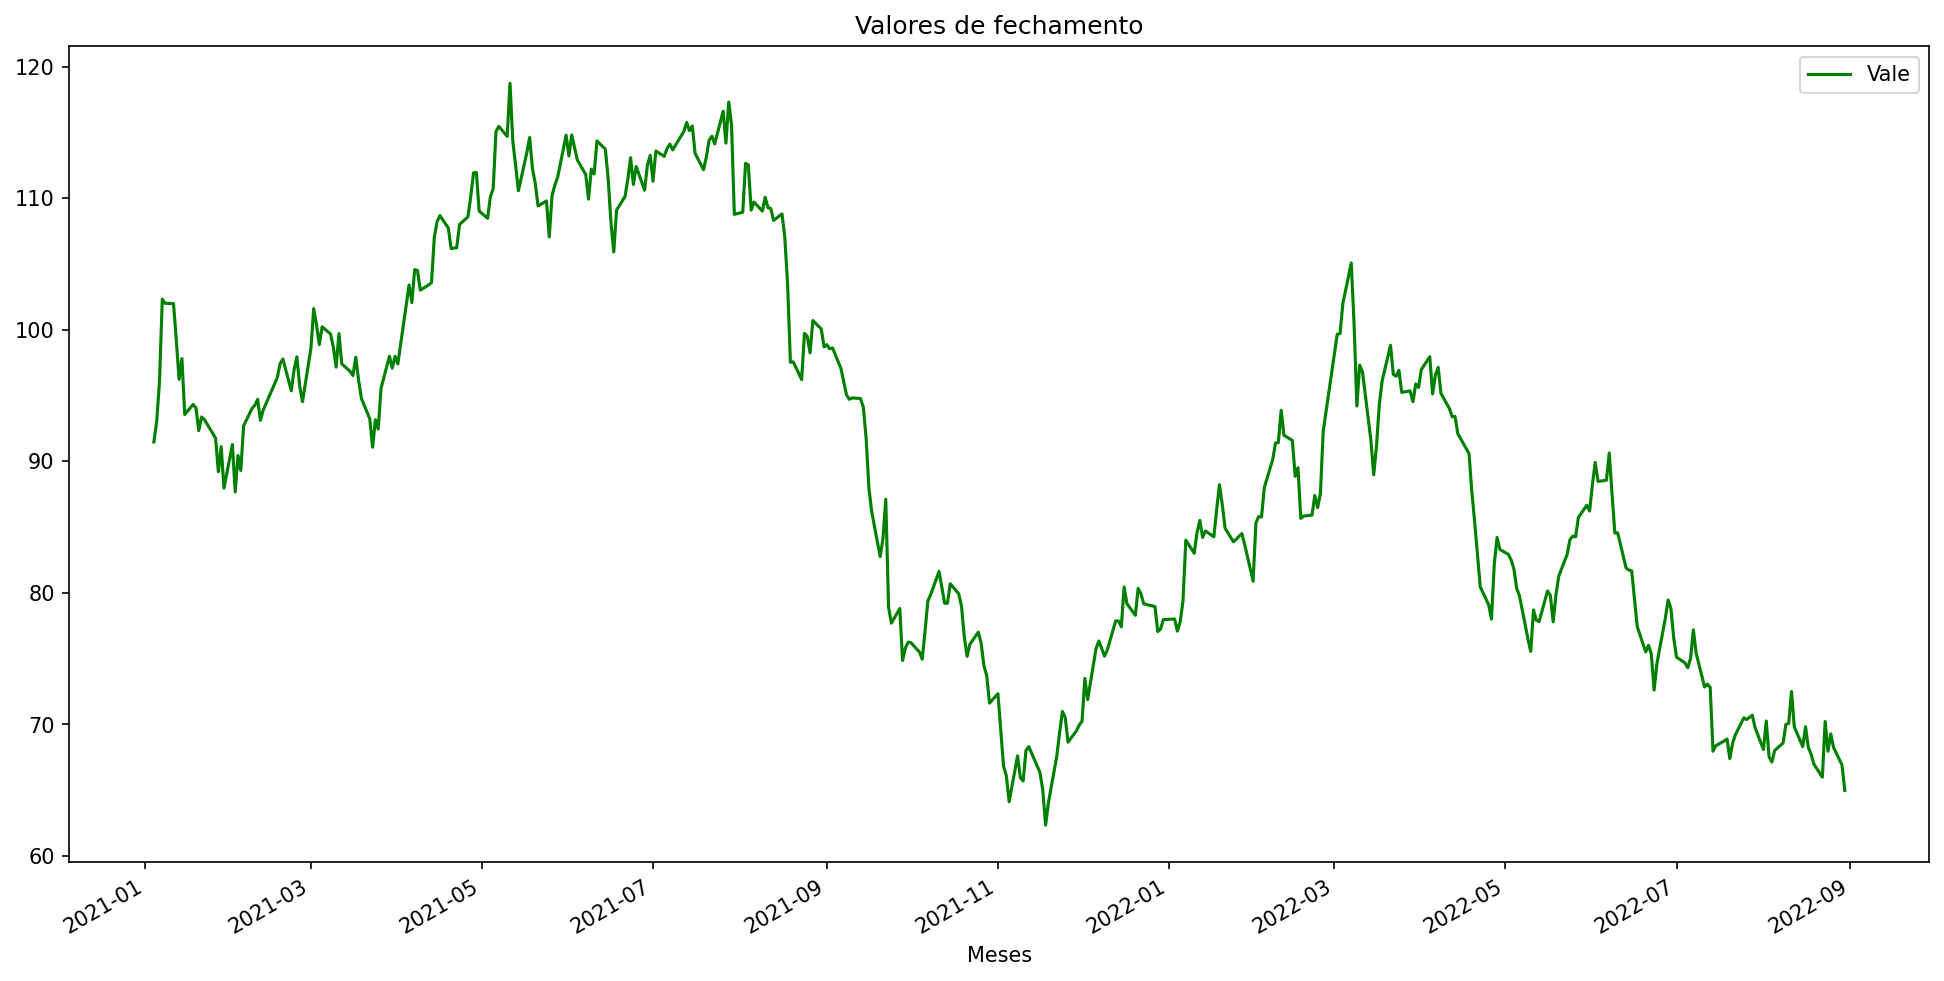

In [20]:
# ------------------
# VALE
# ------------------

# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
dados['VALE3.SA'].plot(label='Vale', color='green')

# adding title to the plot
plt.title('Valores de fechamento')
  
# adding Label to the x-axis
plt.xlabel('Meses')
  
# adding legend to the curve
plt.legend()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

<Figure size 640x480 with 0 Axes>

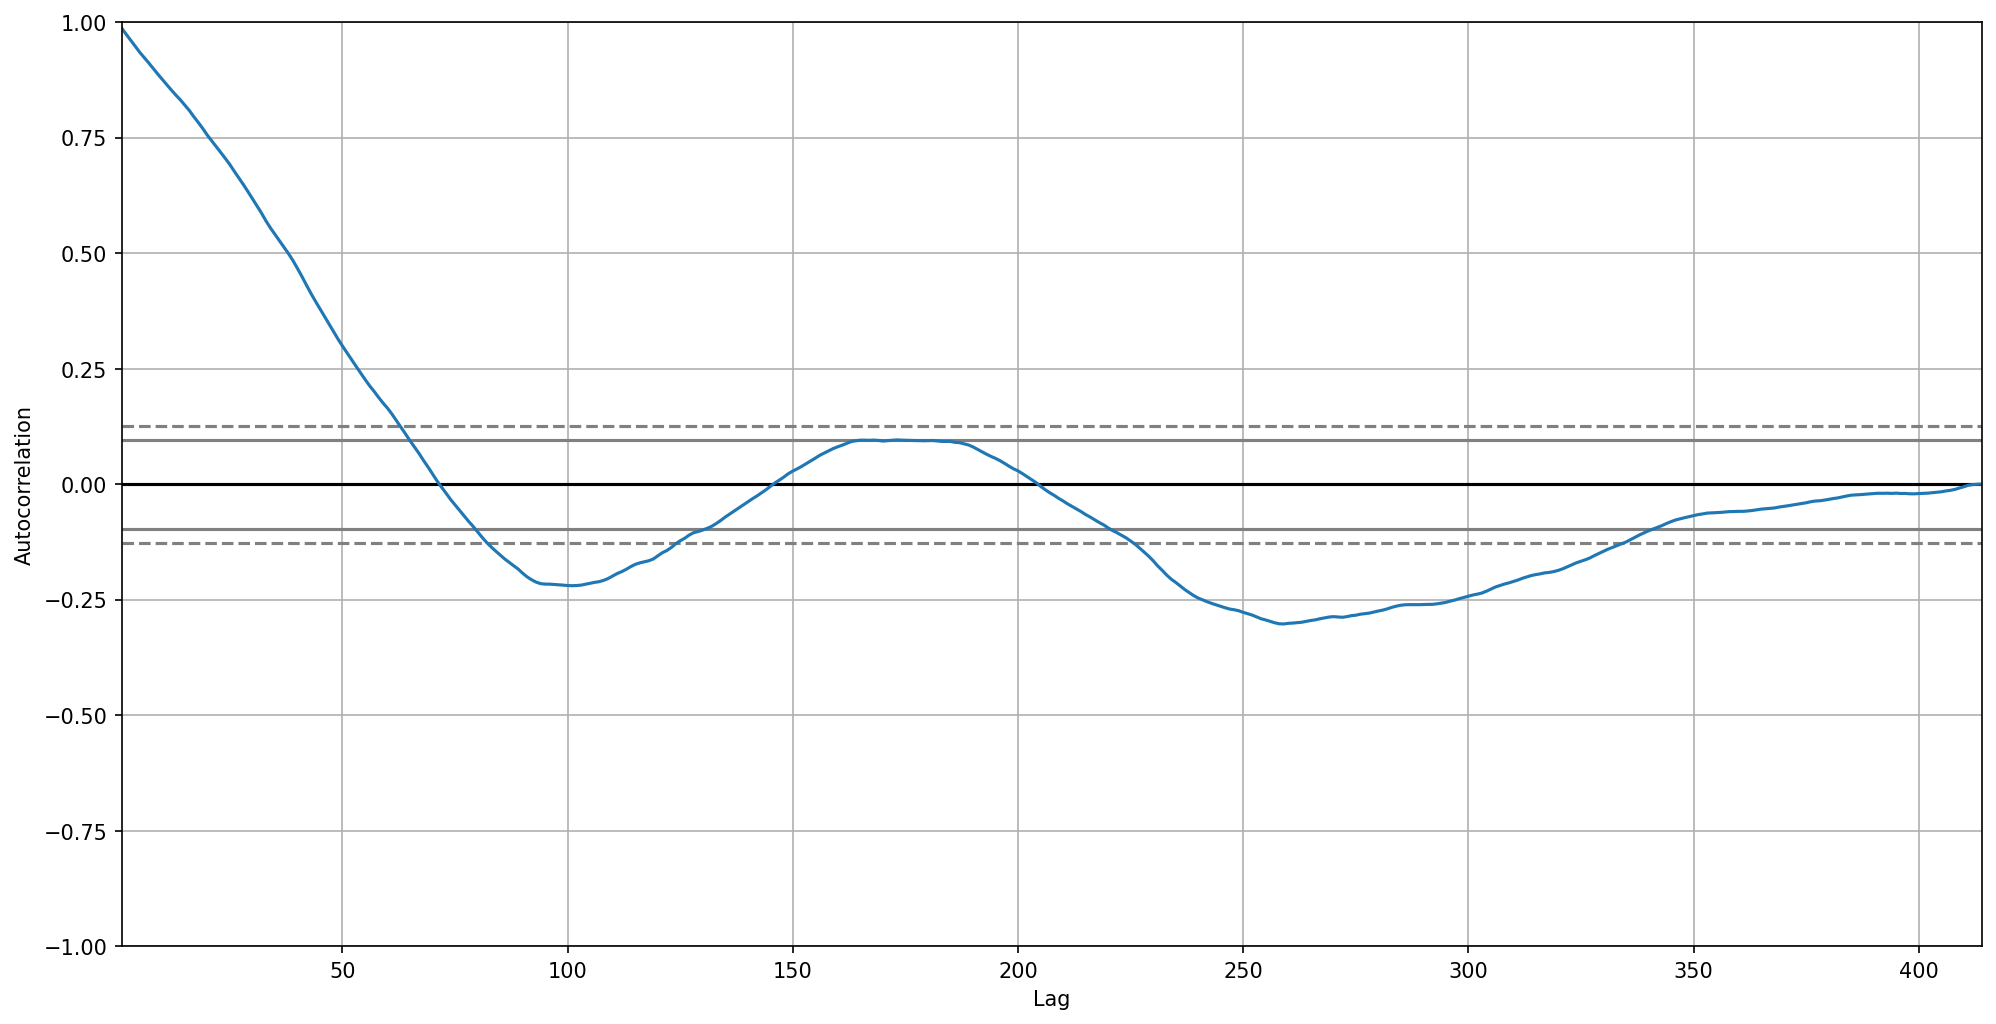

In [21]:
# ------------------
# VALE - AUTOCORRELAÇÃO
# ------------------

from pandas.plotting import autocorrelation_plot
plt.figure()

plt.figure(figsize=(16, 8), dpi=150)
autocorrelation_plot(dados['VALE3.SA'])

## ** Análise de dependencia da série PETR4.SA**

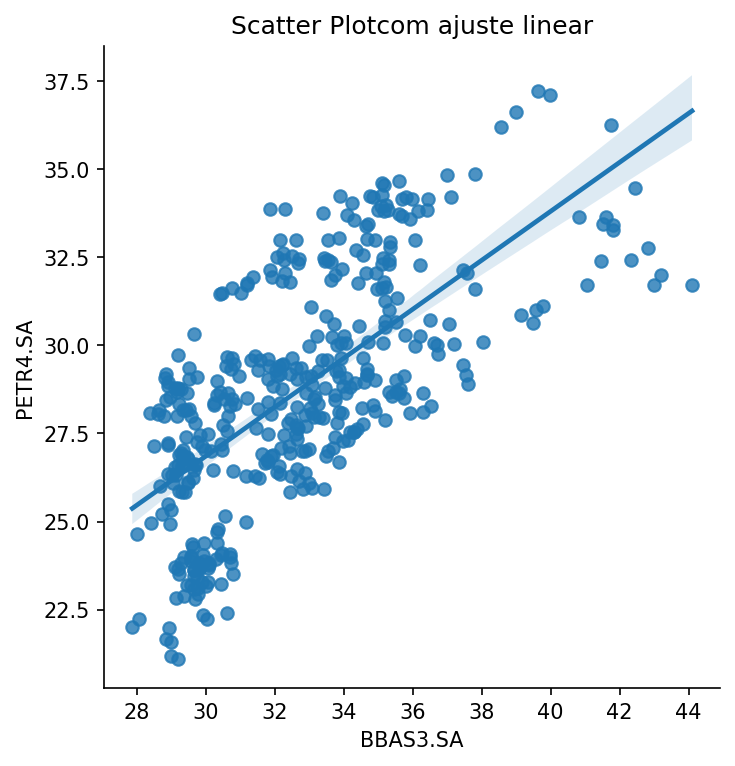

In [23]:
# ------------------
# PETROBRAS x BANCO DO BRASIL 
# ------------------

import seaborn as sns

plt.rcParams.update({'figure.figsize':(16,8), 'figure.dpi':150})
sns.lmplot(x='BBAS3.SA', y='PETR4.SA', data=dados)
plt.title("Scatter Plotcom ajuste linear");

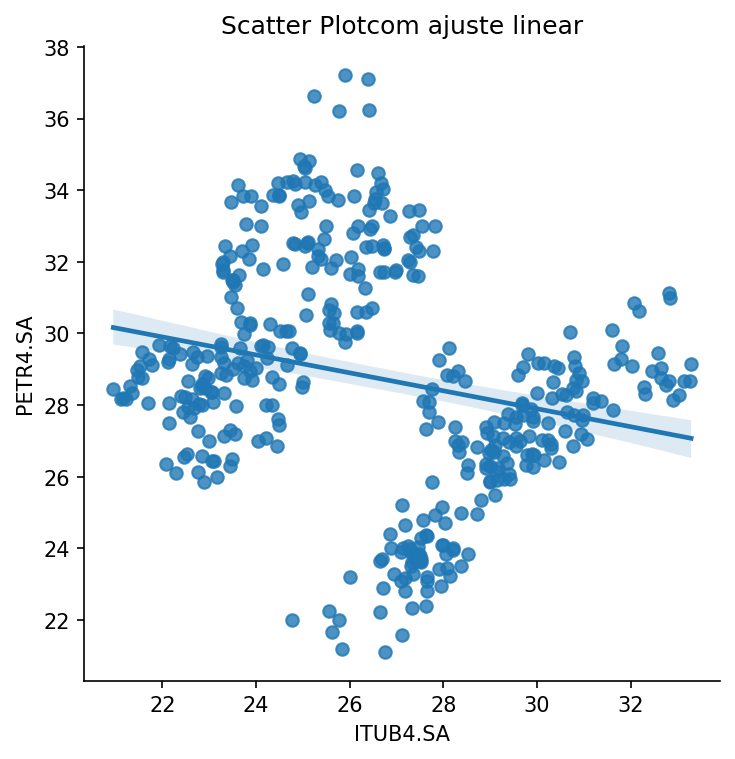

In [24]:
# ------------------
# PETROBRAS x ITAÚ 
# ------------------

import seaborn as sns

plt.rcParams.update({'figure.figsize':(16,8), 'figure.dpi':150})
sns.lmplot(x='ITUB4.SA', y='PETR4.SA', data=dados)
plt.title("Scatter Plotcom ajuste linear");

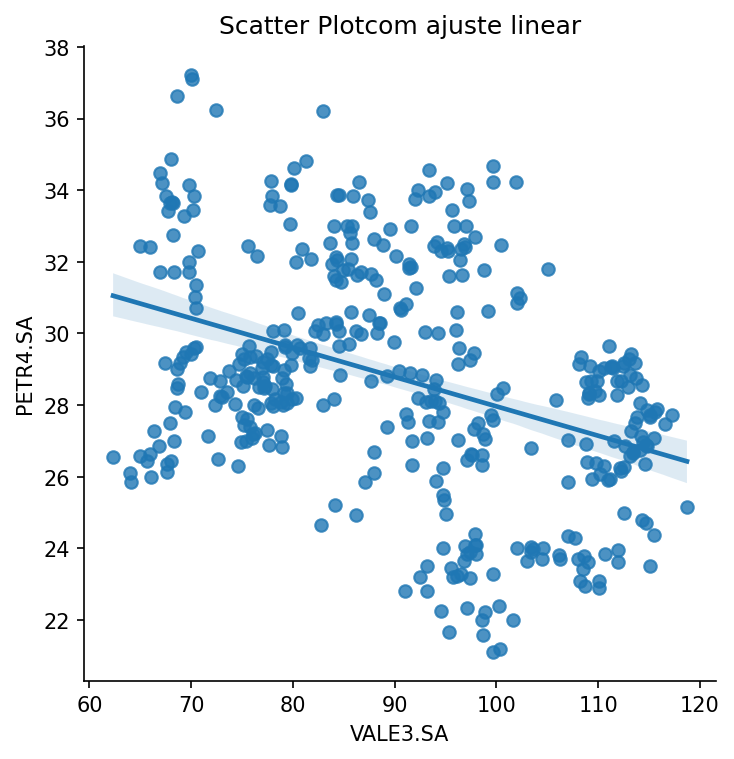

In [25]:
# ------------------
# PETROBRAS x VALE 
# ------------------

import seaborn as sns

plt.rcParams.update({'figure.figsize':(16,8), 'figure.dpi':150})
sns.lmplot(x='VALE3.SA', y='PETR4.SA', data=dados)
plt.title("Scatter Plotcom ajuste linear");

## **Análise de iteração entre as séries**

<Axes: xlabel='Ticker', ylabel='Ticker'>

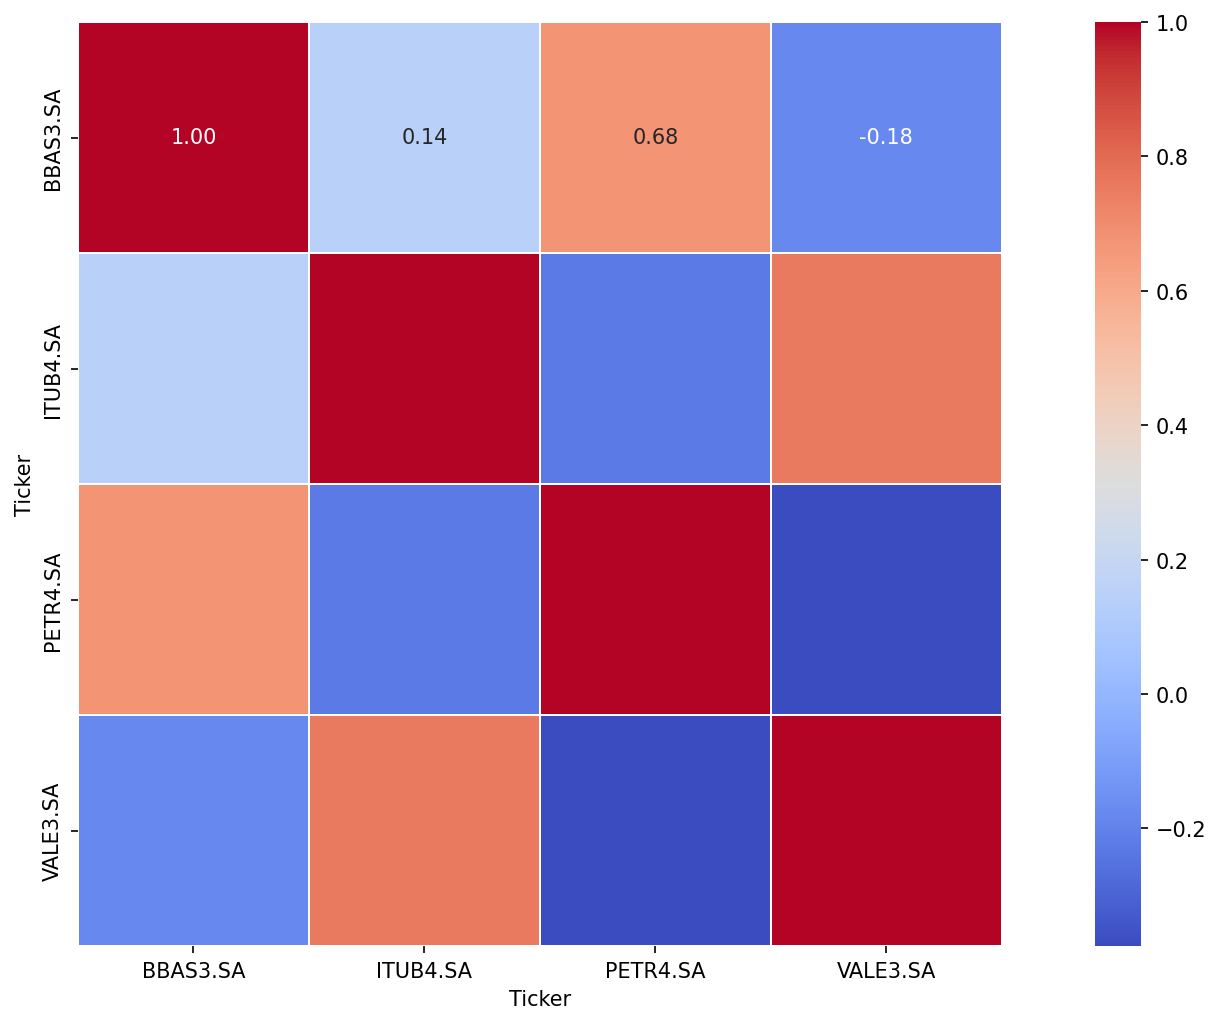

In [26]:
# plotar o heatmap para variáveis numéricas
sns.heatmap(dados.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True)

C:\Users\Felipe Saldanha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Felipe Saldanha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Felipe Saldanha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Felipe Saldanha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

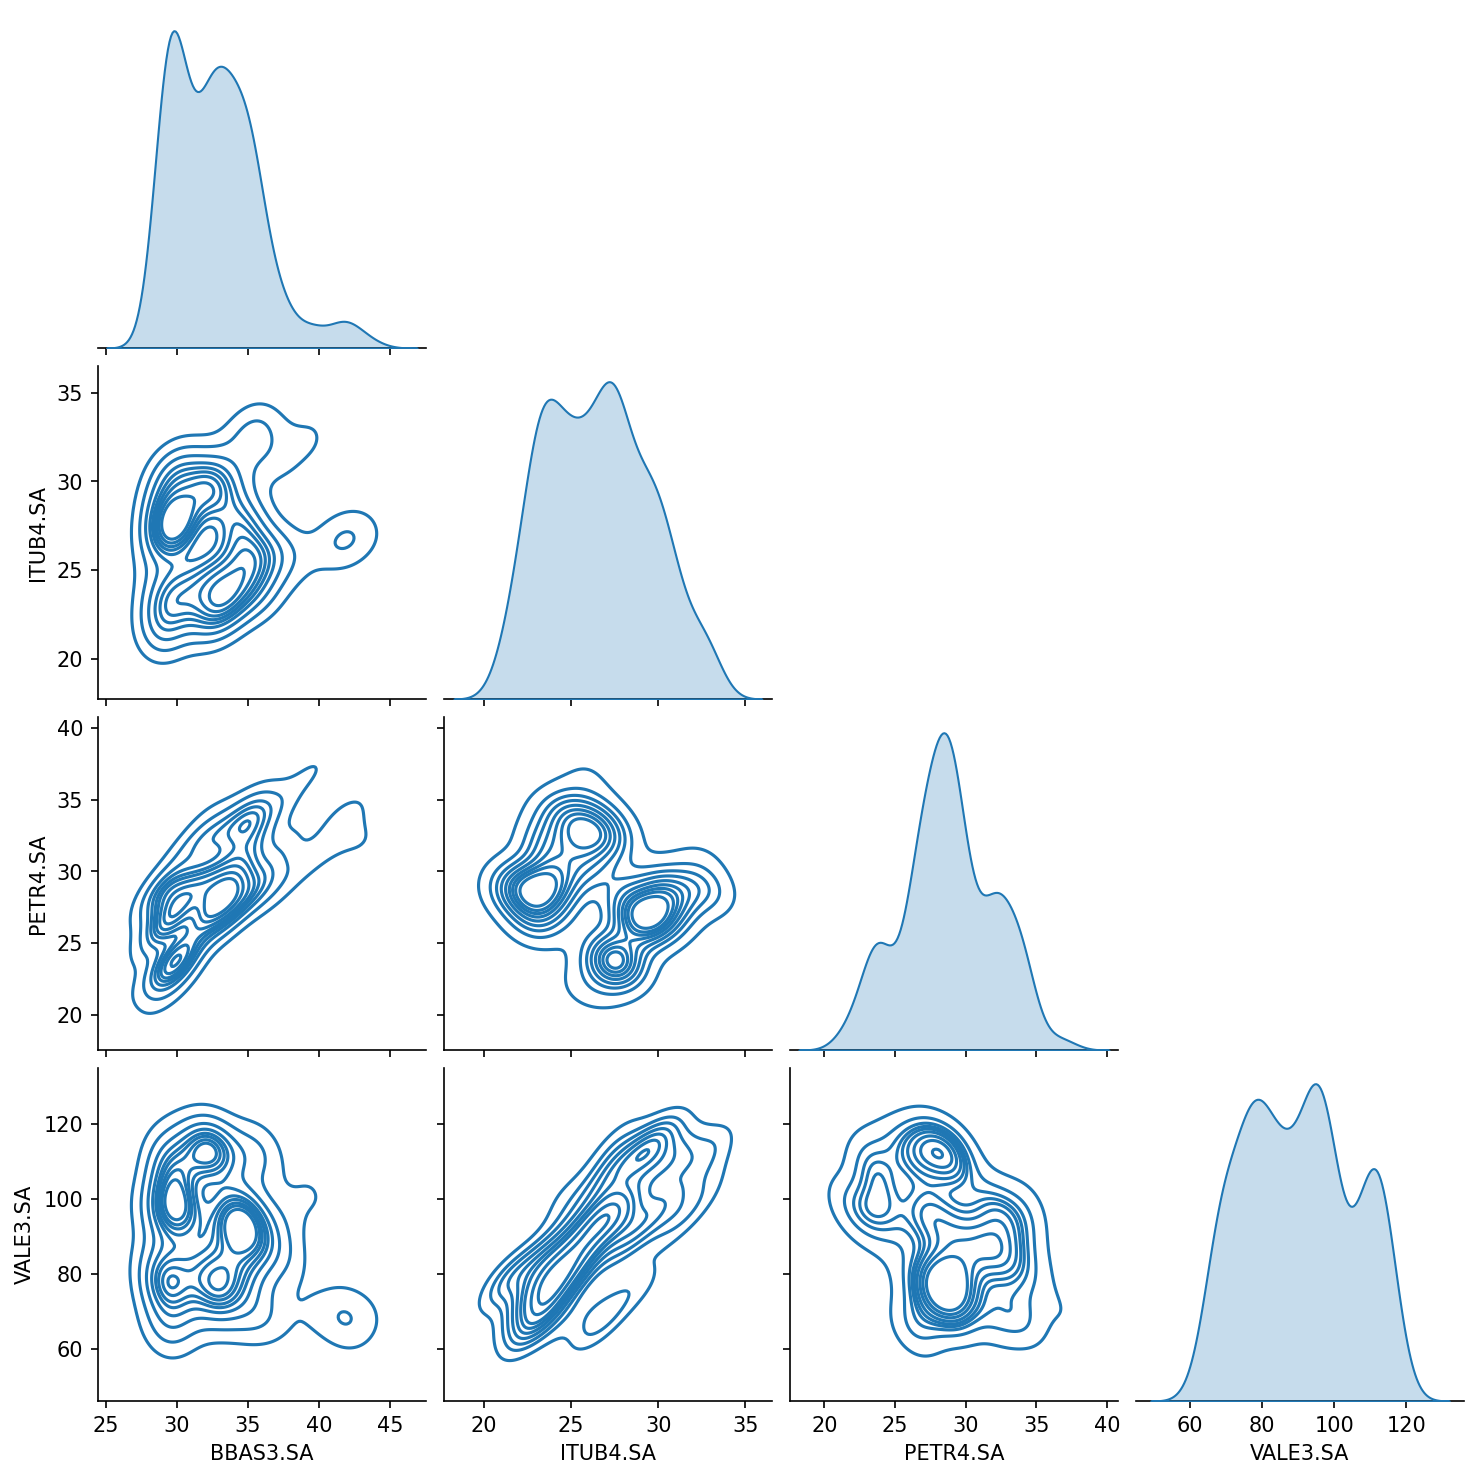

In [27]:
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':150})

sns.pairplot(dados, kind="kde", corner=True)

## **Tratamento de valores ausentes, adequação da frequência das séries temporais e decomposição**

In [28]:
idx = pd.date_range(start=dados.index.min(), end=dados.index.max(), freq='B')
dados = dados.reindex(idx)
dados.fillna(method='ffill', inplace=True)

C:\Users\Felipe Saldanha\AppData\Local\Temp\ipykernel_8280\1345305491.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dados.fillna(method='ffill', inplace=True)


<Figure size 2400x1200 with 0 Axes>

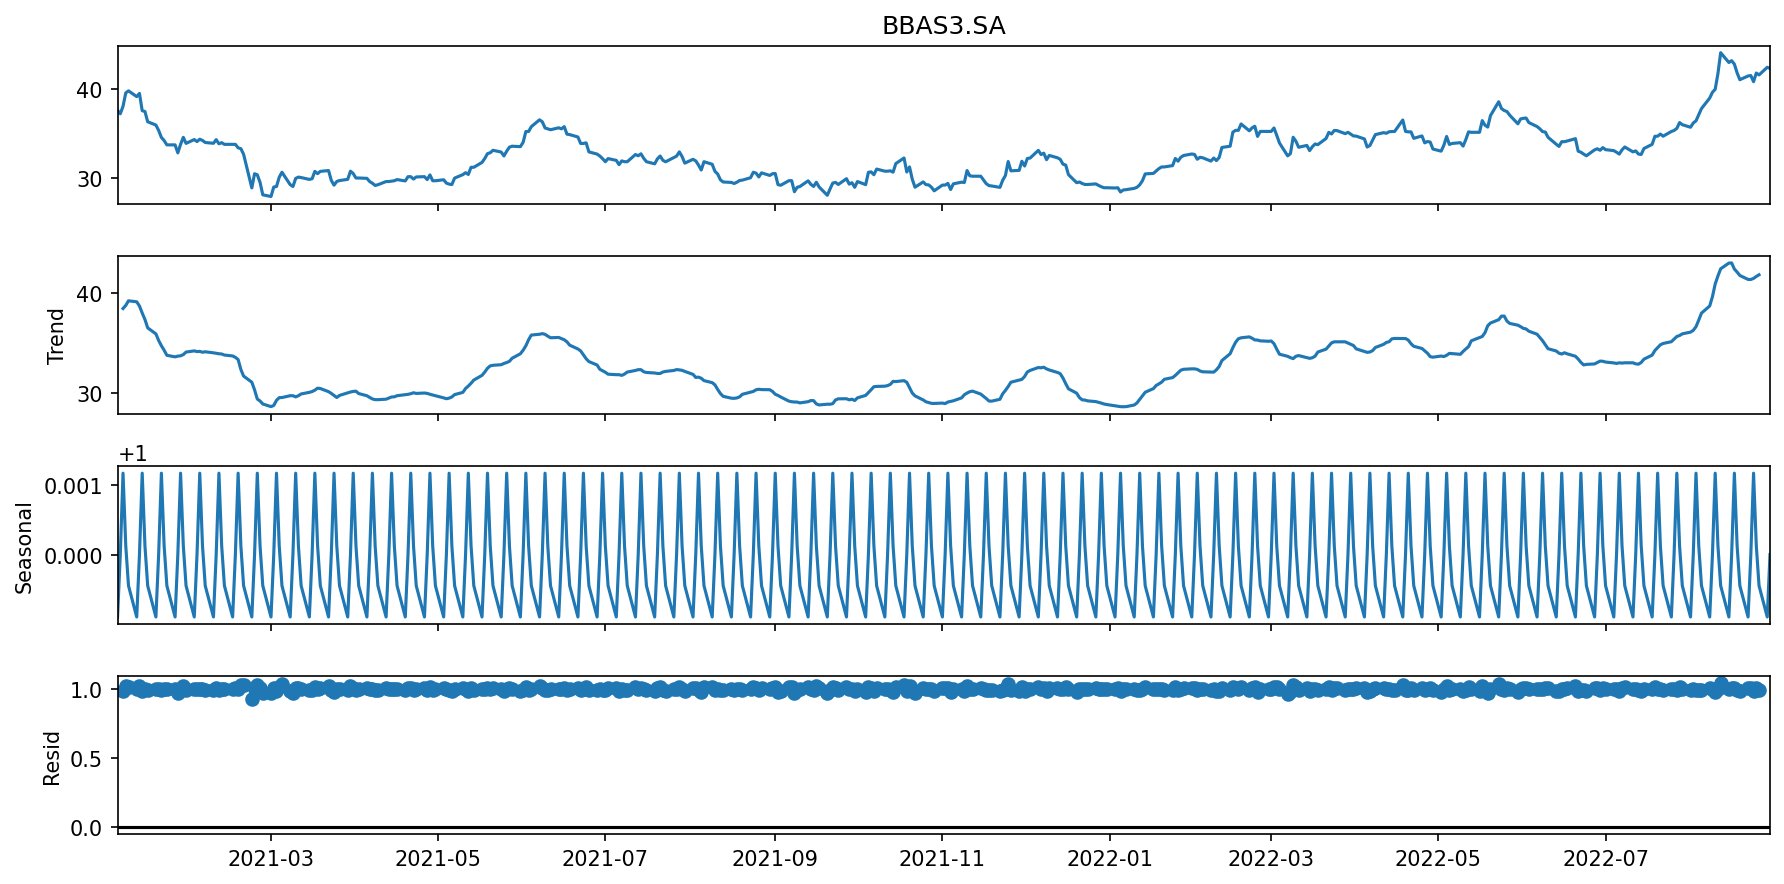

In [31]:
plt.figure(figsize=(16, 8), dpi=150)
result = seasonal_decompose(dados['BBAS3.SA'], model='multiplicative')
result.plot()

pyplot.show()

<Figure size 2400x1200 with 0 Axes>

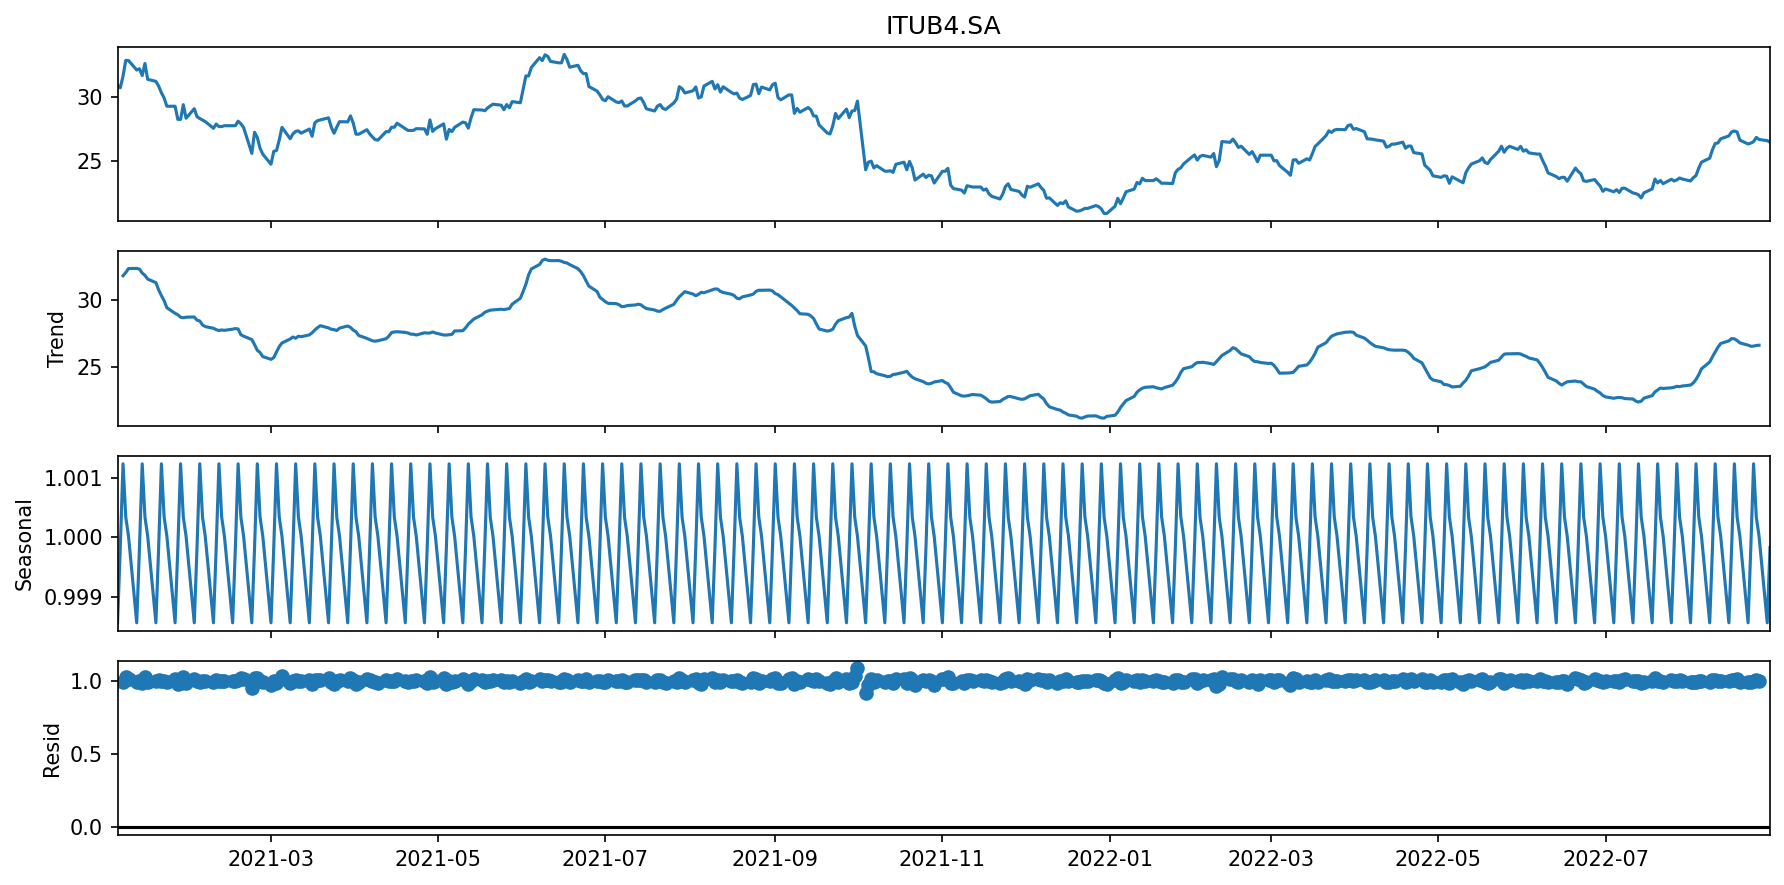

In [32]:
plt.figure(figsize=(16, 8), dpi=150)
result = seasonal_decompose(dados['ITUB4.SA'], model='multiplicative')
result.plot()

pyplot.show()

<Figure size 2400x1200 with 0 Axes>

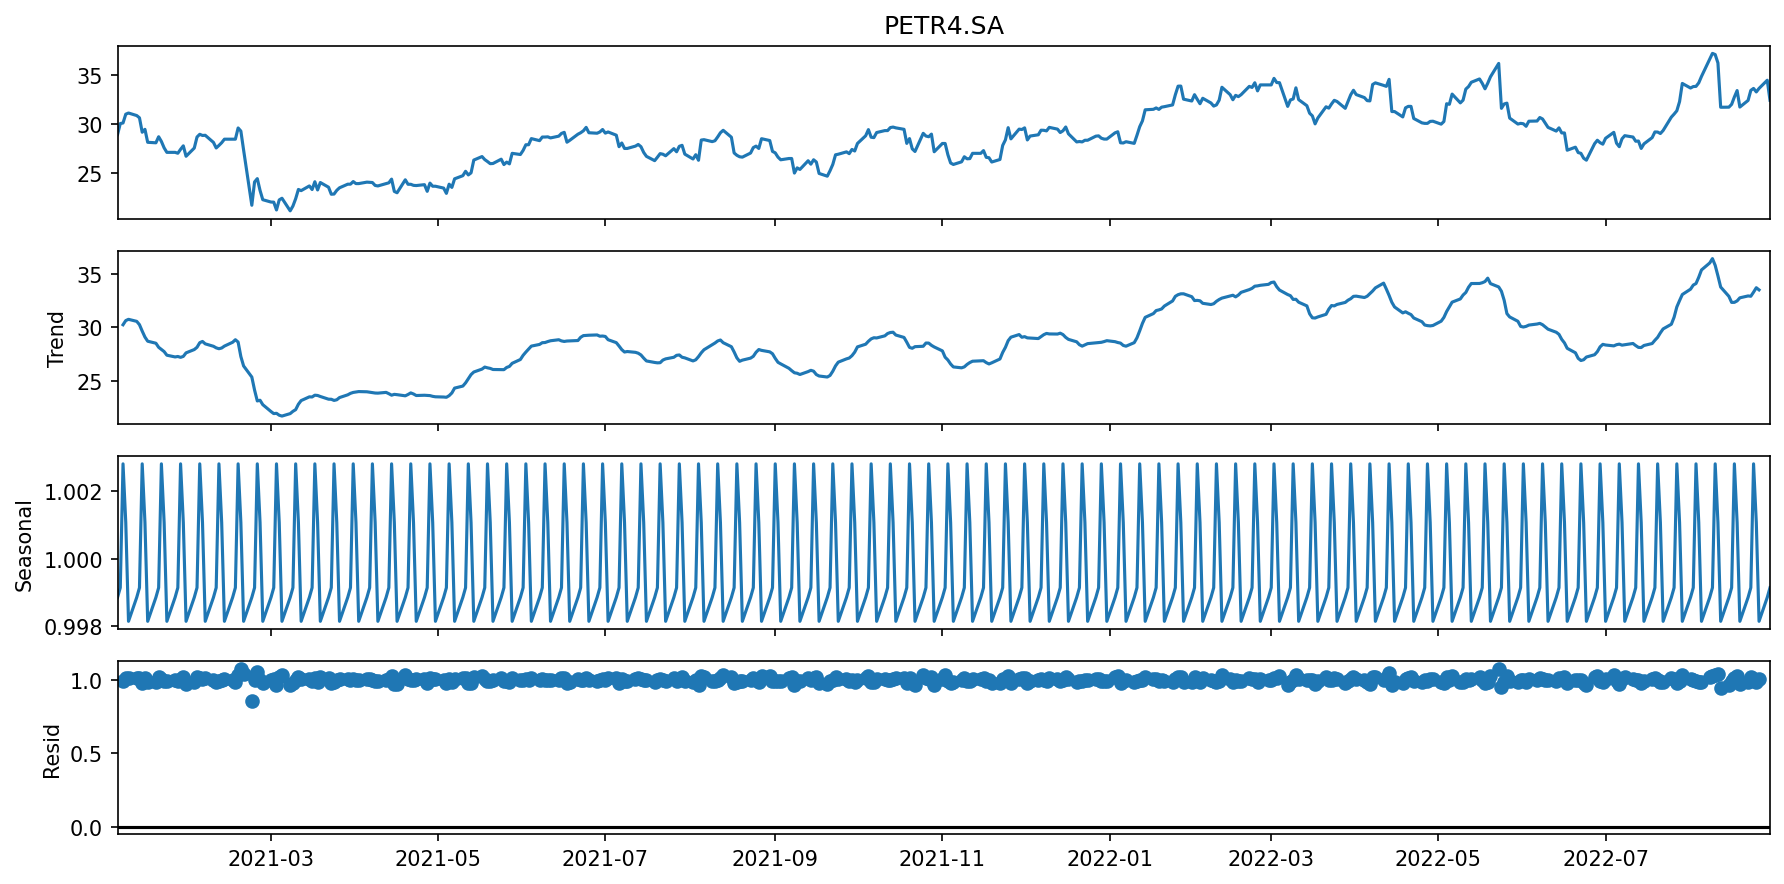

In [33]:
plt.figure(figsize=(16, 8), dpi=150)
result = seasonal_decompose(dados['PETR4.SA'], model='multiplicative')
result.plot()

pyplot.show()

<Figure size 2400x1200 with 0 Axes>

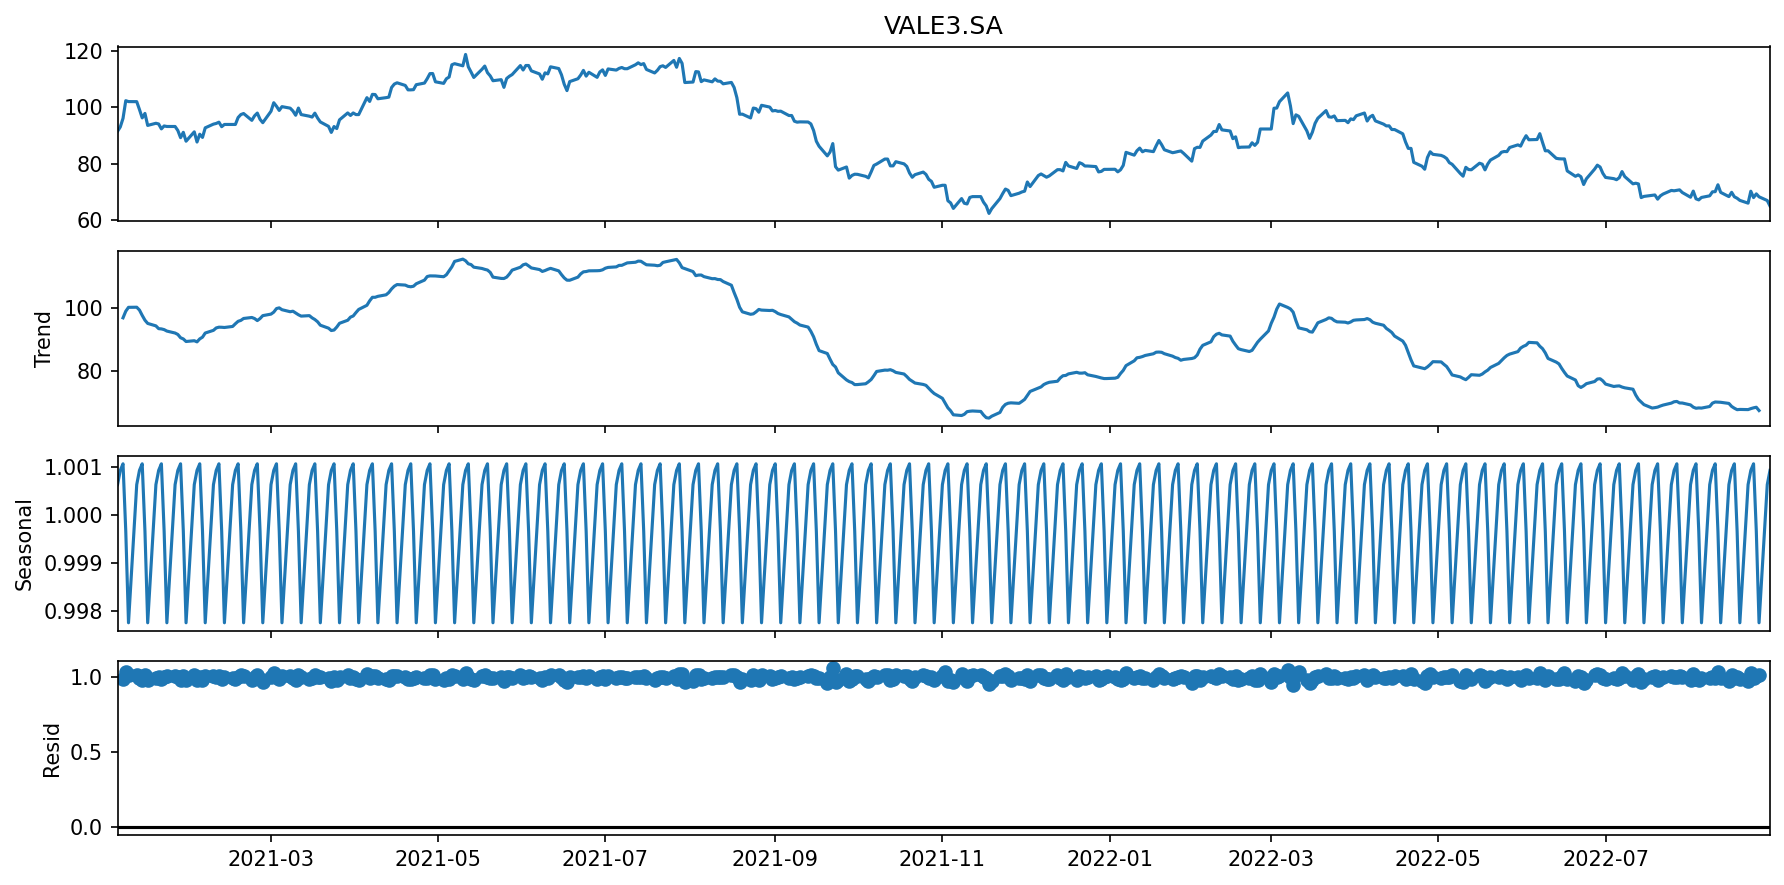

In [34]:
plt.figure(figsize=(16, 8), dpi=150)
result = seasonal_decompose(dados['VALE3.SA'], model='multiplicative')
result.plot()

pyplot.show()

## Data split da Série

In [35]:
len(dados['PETR4.SA'])*0.7

302.4

In [36]:
treino = dados.iloc[:302]
teste = dados.iloc[303:389]
trade = dados.iloc[390:]

In [37]:
n_treino, n_teste, n_trade = len(treino['PETR4.SA']), len(teste['PETR4.SA']), len(trade['PETR4.SA'])

print(f'TAMANHO DAS BASES \n------------------ \nBase treino: \t{n_treino}  \nBase teste: \t{n_teste} \nBase trade: \t{n_trade} \n')

TAMANHO DAS BASES 
------------------ 
Base treino: 	302  
Base teste: 	86 
Base trade: 	42 



## **Treinar e comparar diferentes metodologias**

<br>

 Mean Square Error (MSE) 

In [41]:
from prophet import Prophet
model = Prophet()

exogenous_features = ['VALE3.SA', 'BBAS3.SA', 'ITUB4.SA']

for feature in exogenous_features:
	model.add_regressor(feature)


treino['Date'] = treino.index
model.fit(treino[["Date", "PETR4.SA"] + exogenous_features].rename(columns={"Date": "ds", "PETR4.SA": "y"}))

teste['Date'] = teste.index
forecast = model.predict(teste[["Date", "PETR4.SA"] + exogenous_features].rename(columns={"Date": "ds"}))

C:\Users\Felipe Saldanha\AppData\Local\Temp\ipykernel_8280\771094589.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino['Date'] = treino.index
13:53:38 - cmdstanpy - INFO - Chain [1] start processing
13:53:38 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Felipe Saldanha\AppData\Local\Temp\ipykernel_8280\771094589.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste['Date'] = teste.index


In [42]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,BBAS3.SA,BBAS3.SA_lower,BBAS3.SA_upper,ITUB4.SA,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-03,32.900197,33.228451,35.689716,32.900197,32.900197,2.082516,2.082516,2.082516,-0.151516,...,2.068063,2.068063,2.068063,-0.468375,-0.468375,-0.468375,0.0,0.0,0.0,34.499885
1,2022-03-04,32.923971,32.685074,35.120617,32.923971,32.923971,1.529271,1.529271,1.529271,-0.178500,...,1.543400,1.543400,1.543400,-0.512018,-0.512018,-0.512018,0.0,0.0,0.0,33.955353
2,2022-03-07,32.995294,31.971209,34.400591,32.995194,32.995872,0.607194,0.607194,0.607194,-0.216136,...,0.659570,0.659570,0.659570,-0.540156,-0.540156,-0.540156,0.0,0.0,0.0,33.114708
3,2022-03-08,33.019068,31.814480,34.336374,33.017942,33.020738,0.766173,0.766173,0.766173,-0.232469,...,0.689370,0.689370,0.689370,-0.527211,-0.527211,-0.527211,0.0,0.0,0.0,33.181228
4,2022-03-09,33.042843,33.148165,35.589987,33.040350,33.046211,1.942614,1.942614,1.942614,-0.147965,...,1.796836,1.796836,1.796836,-0.474274,-0.474274,-0.474274,0.0,0.0,0.0,34.365405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2022-06-24,35.586698,33.532927,36.393087,34.961002,36.205717,0.613552,0.613552,0.613552,-0.265844,...,-0.129148,-0.129148,-0.129148,-0.512018,-0.512018,-0.512018,0.0,0.0,0.0,34.945532
82,2022-06-27,35.658021,34.064265,36.850976,35.018475,36.288489,1.039616,1.039616,1.039616,-0.255902,...,0.390819,0.390819,0.390819,-0.540156,-0.540156,-0.540156,0.0,0.0,0.0,35.508684
83,2022-06-28,35.681796,34.250768,36.935119,35.033169,36.326624,1.115925,1.115925,1.115925,-0.274365,...,0.482934,0.482934,0.482934,-0.527211,-0.527211,-0.527211,0.0,0.0,0.0,35.637519
84,2022-06-29,35.705570,34.196572,36.941486,35.043515,36.362038,1.007821,1.007821,1.007821,-0.291408,...,0.341632,0.341632,0.341632,-0.474274,-0.474274,-0.474274,0.0,0.0,0.0,35.572928


In [43]:
prophet_pred = forecast.yhat.to_numpy()
prophet_pred

array([34.49988502, 33.95535258, 33.11470823, 33.18122751, 34.36540475,
       34.18646413, 33.70180548, 33.77634601, 33.3671057 , 33.81128806,
       34.15545902, 34.14838455, 34.74308933, 35.19076544, 35.14081913,
       35.44890169, 35.37874078, 35.20698761, 35.34174593, 35.32222287,
       35.19324942, 35.19821323, 35.04414239, 34.39384838, 34.61320339,
       35.04992272, 35.36594193, 35.51377818, 35.45718641, 35.64770765,
       35.67646517, 35.65659609, 36.49991504, 35.61218514, 35.61336284,
       35.64303618, 35.00156537, 35.17581178, 34.62829868, 34.88827131,
       34.91527771, 34.34022768, 34.21321417, 34.68059574, 35.36148316,
       34.74355039, 34.81518296, 34.81141253, 34.56834904, 35.24813496,
       35.83869981, 35.80542573, 35.92410916, 36.80753517, 36.47856025,
       36.41968149, 37.28302936, 38.40503463, 38.01356715, 37.91700791,
       37.89822989, 37.66356074, 37.08927236, 37.48201596, 37.62594846,
       37.72314634, 37.32666762, 37.07950322, 37.00791363, 36.76

In [44]:
from sklearn.metrics import mean_squared_error as mse

mse_prophet = round(mse(teste['PETR4.SA'],forecast.yhat), 2)

print(f'O valor de mse obtido pelo Prophet foi de {mse_prophet}.')

O valor de mse obtido pelo Prophet foi de 23.22.


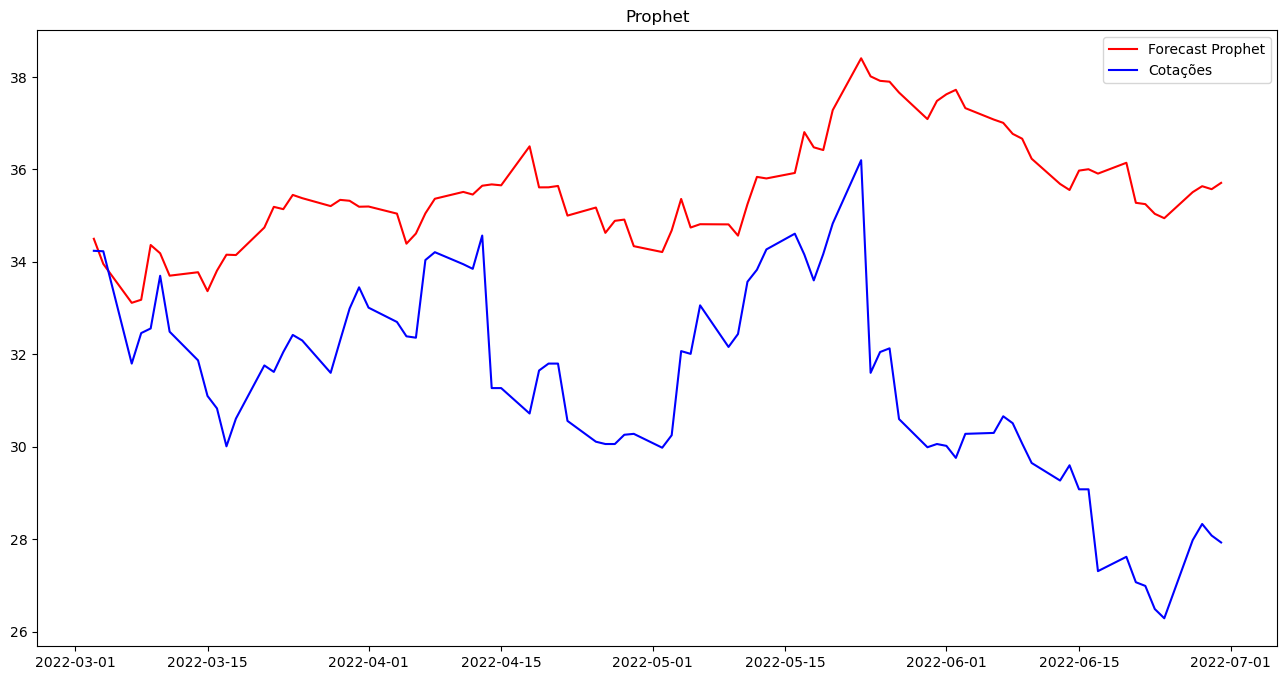

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

plt.figure(figsize = (16,8))


pred = pd.Series(forecast.yhat.to_numpy(), index = teste.index)

plt.plot(pred,  color = 'red', label = 'Forecast Prophet')
plt.plot(teste['PETR4.SA'],color = 'blue', label = 'Cotações')

            
plt.title('Prophet')
plt.legend()
plt.show()

Modelo Oculto de Markov (Espaço de Estado)

In [46]:
!pip install hmmlearn

   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   ------------ -------------------------- 41.0/125.4 kB 330.3 kB/s eta 0:00:01
   -------------------------------------  122.9/125.4 kB 804.6 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 669.4 kB/s eta 0:00:00


In [47]:
import numpy as np 
from hmmlearn import hmm
import pandas as pd

np.random.seed(42)

model = hmm.GaussianHMM(n_components=3, covariance_type="full",algorithm='viterbi')

model.startprob_ = np.array([0.33,0.33,0.34])
model.transmat_ = np.array([[0.7, 0.2, 0.1], [0.3, 0.5, 0.2], [0.3, 0.3, 0.4]])
model.means_ = np.array([[27.0], [30.0], [33.0]])
model.covars_ = np.tile(np.identity(1), (3, 1, 1))

Y = treino['PETR4.SA']
Y = Y[::-1]
X = np.array(Y)
X = np.reshape(X, (-1,1))

model.fit(X)

Y = teste['PETR4.SA']
Y = Y[::-1]
X = np.array(Y)
X = np.reshape(X, (-1,1))

Z =  model.predict(X)

hmm_pred = Z

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
C:\Users\Felipe Saldanha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


In [48]:
from sklearn.metrics import mean_squared_error as mse

mse_hmm = round(mse(teste['PETR4.SA'],Z), 2)

print(f'O valor de mse obtido pelo Modelo Oculto de Markov foi de {mse_hmm}.')

O valor de mse obtido pelo Modelo Oculto de Markov foi de 892.74.


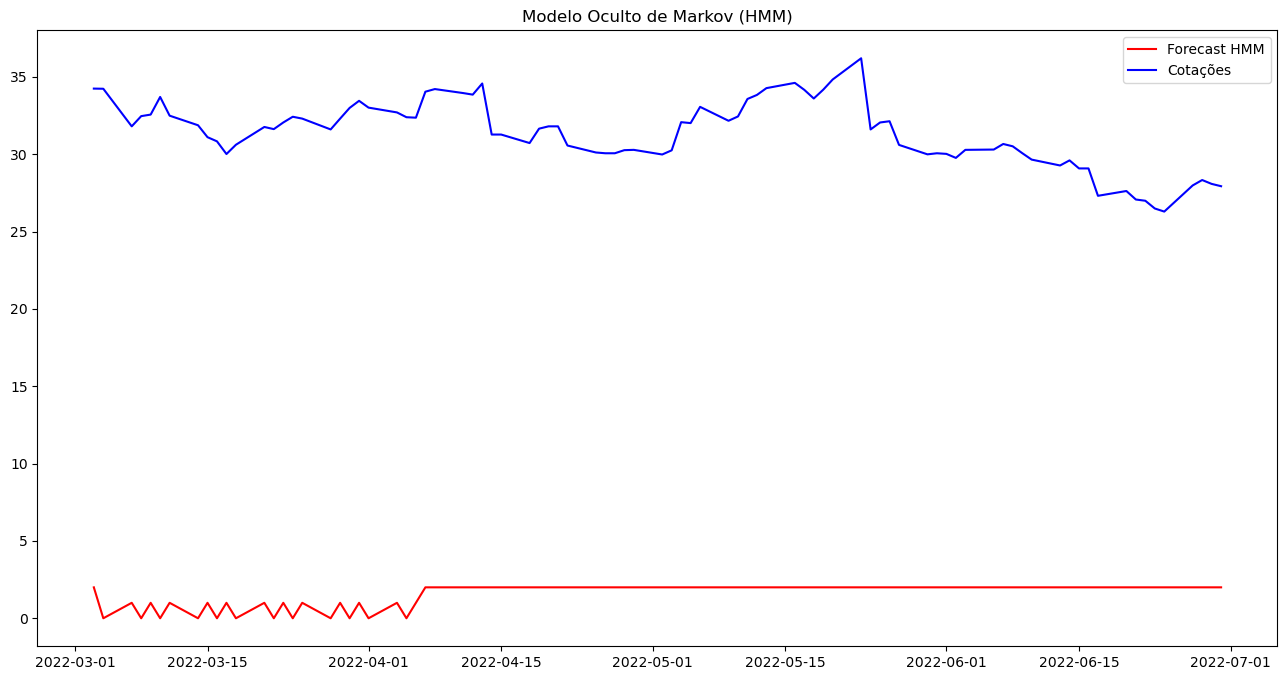

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

plt.figure(figsize = (16,8))


pred = pd.Series(Z, index = teste.index)

plt.plot(pred,  color = 'red', label = 'Forecast HMM')
plt.plot(teste['PETR4.SA'],color = 'blue', label = 'Cotações')

            
plt.title('Modelo Oculto de Markov (HMM)')
plt.legend()
plt.show()

LSTM

In [53]:
import tensorflow as tf
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential


def get_model(params, input_shape):
	model = Sequential()
	model.add(LSTM(units=params["lstm_units"], return_sequences=True, input_shape=(input_shape, 1)))
	model.add(Dropout(rate=params["dropout"]))

	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(LSTM(units=params["lstm_units"], return_sequences=False))
	model.add(Dropout(rate=params["dropout"]))

	model.add(Dense(1))

	model.compile(loss=params["loss"],
              	optimizer=params["optimizer"],
              	metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

	return model


params = {
	"loss": "mean_squared_error",
	"optimizer": "adam",
	"dropout": 0.2,
	"lstm_units": 90,
	"epochs": 30,
	"batch_size": 128,
	"es_patience" : 10
}

X_treino = treino[['VALE3.SA', 'BBAS3.SA', 'ITUB4.SA']]
y_treino = treino['PETR4.SA'] 

X_teste = teste[['VALE3.SA', 'BBAS3.SA', 'ITUB4.SA']]
y_teste = teste['PETR4.SA'] 


model = get_model(params=params, input_shape=X_treino.shape[1])

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',
                                           	mode='min', 
patience=params["es_patience"])

model.fit(
	X_treino,
	y_treino,
	validation_data=(X_teste, y_teste),
	epochs=params["epochs"],
	batch_size=params["batch_size"],
	verbose=1
)

C:\Users\Felipe Saldanha\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 571ms/step - loss: 765.6945 - mean_absolute_error: 27.5483 - root_mean_squared_error: 27.6895 - val_loss: 978.8391 - val_mean_absolute_error: 31.2148 - val_root_mean_squared_error: 31.2864
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 757.8580 - mean_absolute_error: 27.3386 - root_mean_squared_error: 27.4783 - val_loss: 963.7684 - val_mean_absolute_error: 30.9725 - val_root_mean_squared_error: 31.0446
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 741.4831 - mean_absolute_error: 27.1060 - root_mean_squared_error: 27.2517 - val_loss: 934.2915 - val_mean_absolute_error: 30.4929 - val_root_mean_squared_error: 30.5662
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 714.1272 - mean_absolute_error: 26.6158 - root_mean_squared_error: 26.7542 - val_loss: 876.4001 - val_mean_absolute_error: 29.5284 - val_root_mean_squared_error: 29.6041
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 658.1829 - mean_absolute_error: 25

In [54]:
predito = model.predict(X_teste)

mse_lstm = round(mse(teste['PETR4.SA'],predito), 2)

print(f'O valor de MSE obtido pela rede LSTM foi de {mse_lstm}.')

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 395ms/step
O valor de MSE obtido pela rede LSTM foi de 132.03.


In [55]:
predito

array([[20.07033 ],
       [20.07039 ],
       [20.070478],
       [20.07035 ],
       [20.070164],
       [20.070261],
       [20.070246],
       [20.070082],
       [20.069998],
       [20.070068],
       [20.070168],
       [20.070225],
       [20.070305],
       [20.070238],
       [20.070232],
       [20.070248],
       [20.070198],
       [20.070202],
       [20.070177],
       [20.070217],
       [20.070208],
       [20.070248],
       [20.070278],
       [20.070192],
       [20.070238],
       [20.070255],
       [20.070192],
       [20.07016 ],
       [20.070143],
       [20.070143],
       [20.0701  ],
       [20.0701  ],
       [20.070047],
       [20.06995 ],
       [20.06987 ],
       [20.06987 ],
       [20.069687],
       [20.069633],
       [20.069592],
       [20.069754],
       [20.069828],
       [20.0698  ],
       [20.069782],
       [20.069767],
       [20.069738],
       [20.069685],
       [20.06966 ],
       [20.069529],
       [20.069494],
       [20.06962 ],


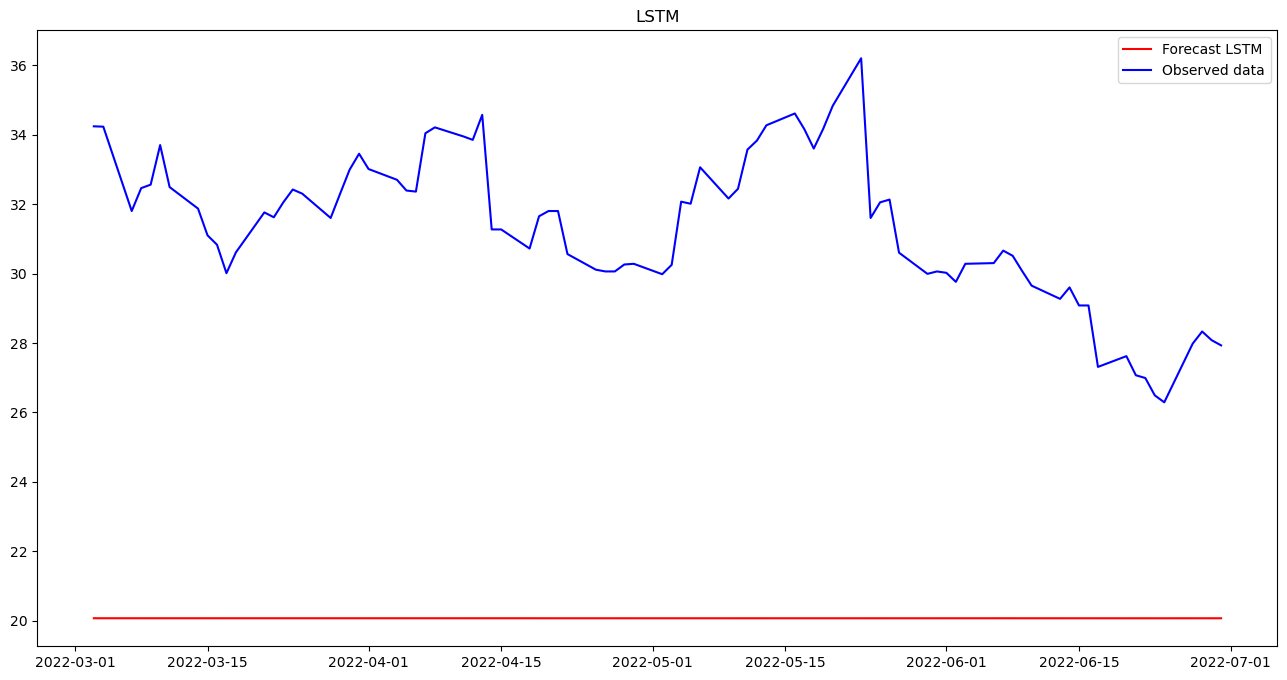

In [56]:
plt.figure(figsize = (16,8))

lstm_pred = predito.flatten()
predito = pd.Series(lstm_pred, index = teste.index)

plt.plot(predito,  color = 'red', label = 'Forecast LSTM')
plt.plot(teste['PETR4.SA'],color = 'blue', label = 'Observed data')

            
plt.title('LSTM')
plt.legend()
plt.show()

ARIMA

In [57]:
!pip install scipy==1.5.0

     ---------------------------------------- 0.0/25.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/25.6 MB ? eta -:--:--
     --------------------------------------- 0.0/25.6 MB 262.6 kB/s eta 0:01:38
     --------------------------------------- 0.1/25.6 MB 409.6 kB/s eta 0:01:03
     --------------------------------------- 0.1/25.6 MB 774.0 kB/s eta 0:00:33
      --------------------------------------- 0.4/25.6 MB 1.6 MB/s eta 0:00:16
     - -------------------------------------- 0.9/25.6 MB 3.2 MB/s eta 0:00:08
     - -------------------------------------- 1.0/25.6 MB 3.6 MB/s eta 0:00:07
     --- ------------------------------------ 2.2/25.6 MB 6.3 MB/s eta 0:00:04
     ---- ----------------------------------- 3.1/25.6 MB 8.0 MB/s eta 0:00:03
     ---- ----------------------------------- 3.1/25.6 MB 8.0 MB/s eta 0:00:03
     ------- -------------------------------- 5.0/25.6 MB 10.1 MB/s eta 0:00:03
     ----------- ---------------------------- 7.6/25.6 MB 13.9

  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [346 lines of output]
  Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_system != "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_system == "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version >= "3.8" and platform_system == "AIX"' don't match your environment
    Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
    Using cached setuptools-69.2.0-py3-none-any.whl.metadata (6.3 kB)
       ---------------------------------------- 0.0/6.4 MB ? eta -:--:--
       ---------------------------------------- 0.0/6.4 MB ? eta -:--:--
       ------

In [58]:
!pip install statsmodels==0.12.1

     ---------------------------------------- 0.0/17.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/17.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/17.4 MB ? eta -:--:--
     --------------------------------------- 0.0/17.4 MB 245.8 kB/s eta 0:01:11
     --------------------------------------- 0.1/17.4 MB 476.3 kB/s eta 0:00:37
      --------------------------------------- 0.2/17.4 MB 1.0 MB/s eta 0:00:17
     - -------------------------------------- 0.5/17.4 MB 2.0 MB/s eta 0:00:09
     -- ------------------------------------- 1.0/17.4 MB 3.3 MB/s eta 0:00:05
     -- ------------------------------------- 1.0/17.4 MB 3.3 MB/s eta 0:00:05
     -- ------------------------------------- 1.0/17.4 MB 3.3 MB/s eta 0:00:05
     -- ------------------------------------- 1.0/17.4 MB 3.3 MB/s eta 0:00:05
     -- ------------------------------------- 1.0/17.4 MB 3.3 MB/s eta 0:00:05
     -- ------------------------------------- 1.0/17.4 MB 3.3 MB/s eta 

  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [156 lines of output]
  Ignoring numpy: markers 'python_version == "3.6"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7"' don't match your environment
    Using cached setuptools-69.2.0-py3-none-any.whl.metadata (6.3 kB)
    Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
    Using cached Cython-3.0.9-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
       ---------------------------------------- 0.0/6.4 MB ? eta -:--:--
       ---------------------------------------- 0.0/6.4 MB ? eta -:--:--
       ---------------------------------------- 0.0/6.4 MB 259.2 kB/s eta 0:00:25
       ---------------------------------------- 0.1/6.4 MB 409.6 kB/s eta 0:00:16
       - -------------------------------------- 0.2/6.4 MB 980.4 kB/s eta 0:00:07
       --- ------------------------------------ 0.5/6.4 MB 2.0 MB/s eta 0:00:03
 

In [62]:
!pip install pmdarima

  Using cached Cython-3.0.9-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   -- ------------------------------------ 41.0/614.7 kB 281.8 kB/s eta 0:00:03
   ------- ------------------------------ 122.9/614.7 kB 722.1 kB/s eta 0:00:01
   ----------------------- ---------------- 358.4/614.7 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 2.6 MB/s eta 0:00:00
Using cached Cython-3.0.9-cp311-cp311-win_amd64.whl (2.8 MB)


In [63]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                              

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

np.random.seed(0) 


stepwise_fit = auto_arima(treino['PETR4.SA'], start_p=0, start_q=0,
                          max_p=6, max_q=6, m=5,
                          seasonal=True,
                          trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=647.777, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=644.160, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=647.430, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=647.303, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=642.336, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=646.083, Time=0.05 sec
 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=646.090, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=645.500, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=645.365, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[5] intercept   : AIC=645.729, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[5]          
Total fit time: 0.791 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  302
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -320.168
Date:                Wed, 20 Mar 2024   AIC                            642.336
Time:                        14:10:08   BIC                            646.043
Sample:                    01-04-2021   HQIC                           643.819
                         - 03-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.4914      0.014     34.386      0.000       0.463       0.519
===================================================================================
Ljung-Box (L1) (Q):                   0.66   Jarque-Bera (JB):              2575.94
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                            -1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
from sklearn.metrics import mean_squared_error as mse

arima_pred = stepwise_fit.predict(n_teste)

mse_arima = round(mse(teste['PETR4.SA'],arima_pred), 2)

print(f'O valor de mse obtido pelo ARIMA foi de {mse_arima}.')

O valor de mse obtido pelo ARIMA foi de 11.42.


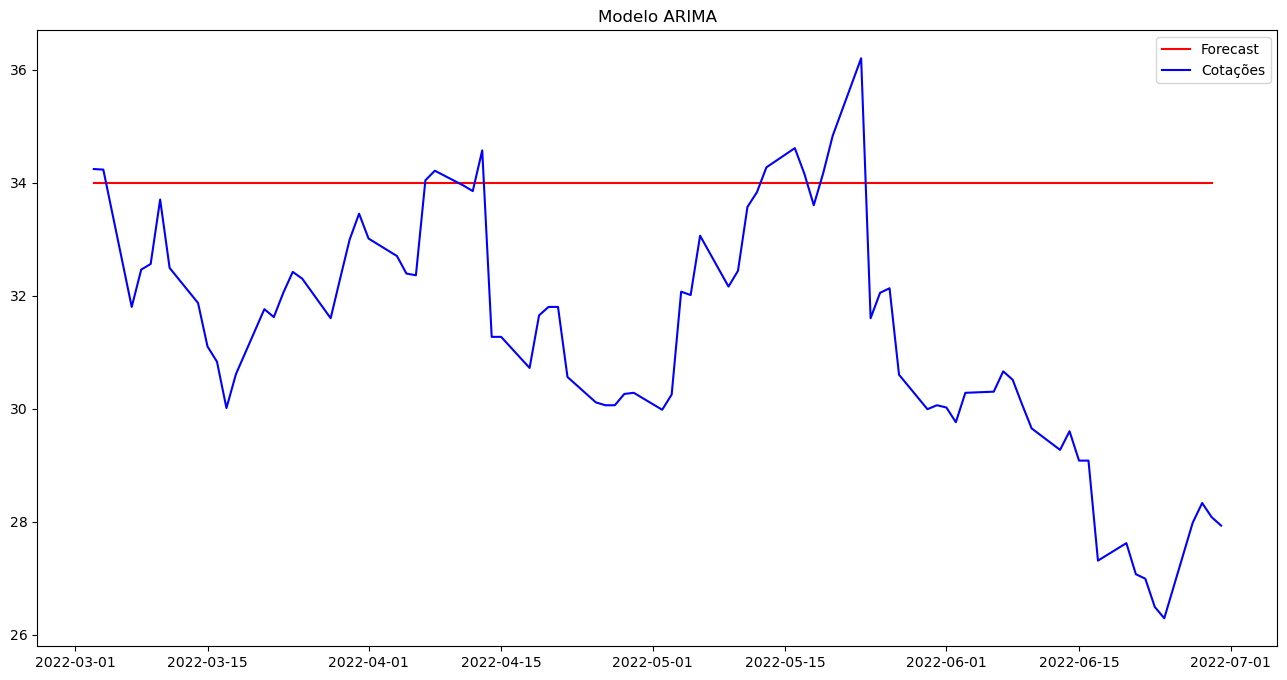

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

plt.figure(figsize = (16,8))


pred = pd.Series(arima_pred, index = teste.index)

plt.plot(pred,  color = 'red', label = 'Forecast')
plt.plot(teste['PETR4.SA'],color = 'blue', label = 'Cotações')

            
plt.title('Modelo ARIMA')
plt.legend()
plt.show()

## **Comparação entre os modelos**


In [66]:

df_mse = pd.DataFrame(
    {
        'Modelos': ['ARIMA', 'HMM', 'LSTM', 'Prophet'],
        'MSE': [mse_arima, mse_hmm, mse_lstm, mse_prophet]
    }
)

df_mse ## ARIMA melhor performance

,Modelos,MSE
0,ARIMA,11.42
1,HMM,892.74
2,LSTM,132.03
3,Prophet,23.22


## Avaliar outras medidas: Mean Absolute Error Percentage (MAPE) e Mean Absolute Error (MAE)


In [67]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mape_arima = round(mape(teste['PETR4.SA'], arima_pred), 2)
mape_prophet = round(mape(teste['PETR4.SA'], prophet_pred), 2)
mape_hmm = round(mape(teste['PETR4.SA'], hmm_pred), 2)
mape_lstm = round(mape(teste['PETR4.SA'], lstm_pred), 2)



df_mape = pd.DataFrame(
    {
        'Modelos': ['ARIMA', 'HMM', 'LSTM', 'Prophet'],
        'MAPE': [mape_arima, mape_hmm, mape_lstm, mape_prophet]
    }
)

df_mape

,Modelos,MAPE
0,ARIMA,0.09
1,HMM,0.95
2,LSTM,0.36
3,Prophet,0.14


Vamos utilizar a Mean Absolute Error (MAE) para escolha do melhor modelo. A MAE é dada por:
$$
 MAE = \sum_{t=1}^{n} \frac{|y_{t}-\hat{y}_{t}|}{n}.
$$

In [68]:
from sklearn.metrics import mean_absolute_error as mae

mae_arima = round(mae(teste['PETR4.SA'], arima_pred), 2)
mae_prophet = round(mae(teste['PETR4.SA'], prophet_pred), 2)
mae_hmm = round(mae(teste['PETR4.SA'], hmm_pred), 2)
mae_lstm = round(mae(teste['PETR4.SA'], lstm_pred), 2)



df_mae = pd.DataFrame(
    {
        'Modelos': ['ARIMA', 'HMM', 'LSTM', 'Prophet'],
        'MAE': [mae_arima, mae_hmm, mae_lstm, mae_prophet]
    }
)

df_mae

,Modelos,MAE
0,ARIMA,2.76
1,HMM,29.78
2,LSTM,11.29
3,Prophet,4.17


## **Modelo banchmark: SARIMAX**

In [69]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                              

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

np.random.seed(0) 

exogenous_features = ['VALE3.SA', 'BBAS3.SA', 'ITUB4.SA']

stepwise_fit = auto_arima(treino['PETR4.SA'], start_p=0, start_q=0,
                          max_p=6, max_q=6, m=5,
                          seasonal=True,
                          trace=True,
                          exogenous=treino[exogenous_features],
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=647.777, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=644.160, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=647.430, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=647.303, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=642.336, Time=0.04 sec
 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=646.083, Time=0.06 sec
 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=646.090, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=645.500, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=645.365, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[5] intercept   : AIC=645.729, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[5]          
Total fit time: 0.809 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  302
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -320.168
Date:                Wed, 20 Mar 2024   AIC                            642.336
Time:                        14:12:18   BIC                            646.043
Sample:                    01-04-2021   HQIC                           643.819
                         - 03-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.4914      0.014     34.386      0.000       0.463       0.519
===================================================================================
Ljung-Box (L1) (Q):                   0.66   Jarque-Bera (JB):              2575.94
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                            -1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
from sklearn.metrics import mean_squared_error as mse

sarimax_pred = stepwise_fit.predict(n_teste, 
                                    exogenous=teste[exogenous_features])

mse_sarimax = round(mse(teste['PETR4.SA'],sarimax_pred), 2)

print(f'O valor de mse obtido pelo SARIMAX foi de {mse_sarimax}.')

O valor de mse obtido pelo SARIMAX foi de 11.42.


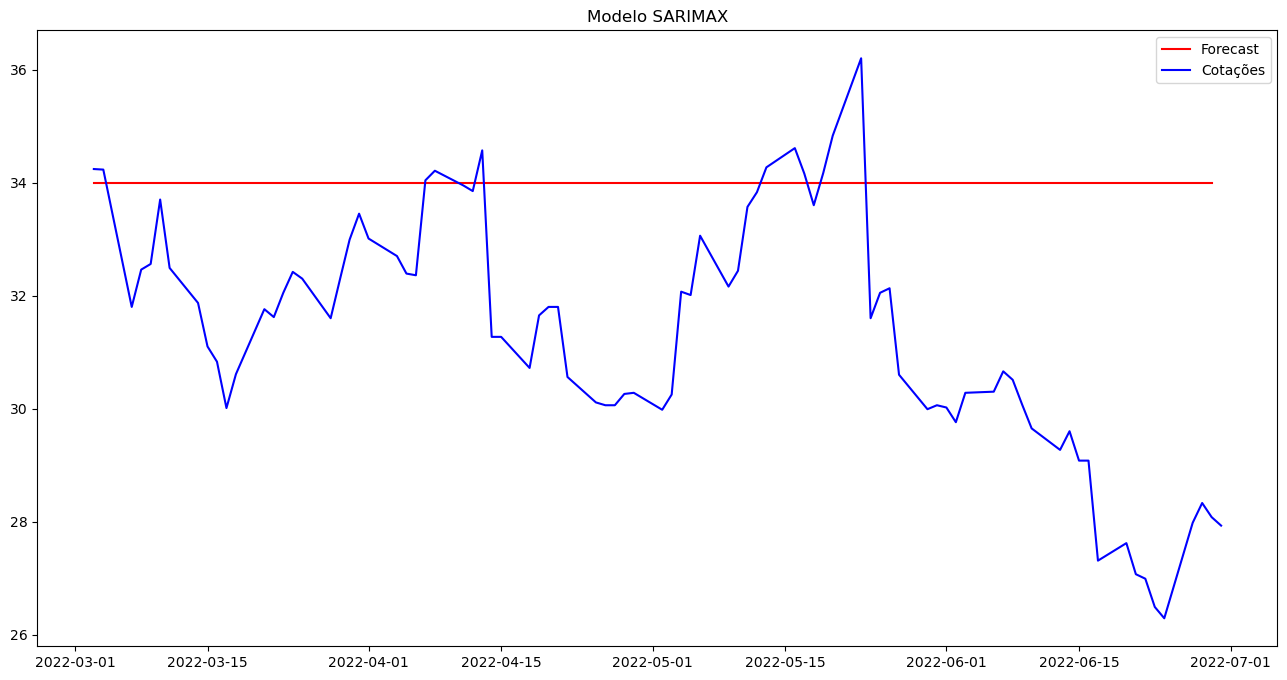

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

plt.figure(figsize = (16,8))


pred = pd.Series(sarimax_pred, index = teste.index)

plt.plot(pred,  color = 'red', label = 'Forecast')
plt.plot(teste['PETR4.SA'],color = 'blue', label = 'Cotações')

            
plt.title('Modelo SARIMAX')
plt.legend()
plt.show()

## **Comparar o ganho de performance do modelo proposto com relação ao modelo benchmark**


In [72]:
mape_sarimax = round(mape(teste['PETR4.SA'], sarimax_pred), 2)
mae_sarimax = round(mae(teste['PETR4.SA'], sarimax_pred), 2)


comparacao = pd.DataFrame({'Metrica': ['MSE', 'MAPE', 'MAE'], 
                           'Melhor Modelo': [mse_arima, mape_arima, mae_arima],
                           'Banchmark': [mse_sarimax, mape_sarimax, mae_sarimax]})
comparacao # SARIMAX wins!

,Metrica,Melhor Modelo,Banchmark
0,MSE,11.42,11.42
1,MAPE,0.09,0.09
2,MAE,2.76,2.76


# **DEPLOYMENT**


In [73]:
sarimax_trade = stepwise_fit.predict(n_trade, 
                                    exogenous=trade[exogenous_features])

mse_sarimax = round(mse(teste['PETR4.SA'],sarimax_pred), 2)

print(f'O valor de mse obtido pelo SARIMAX foi de {mse_sarimax}.')

O valor de mse obtido pelo SARIMAX foi de 11.42.


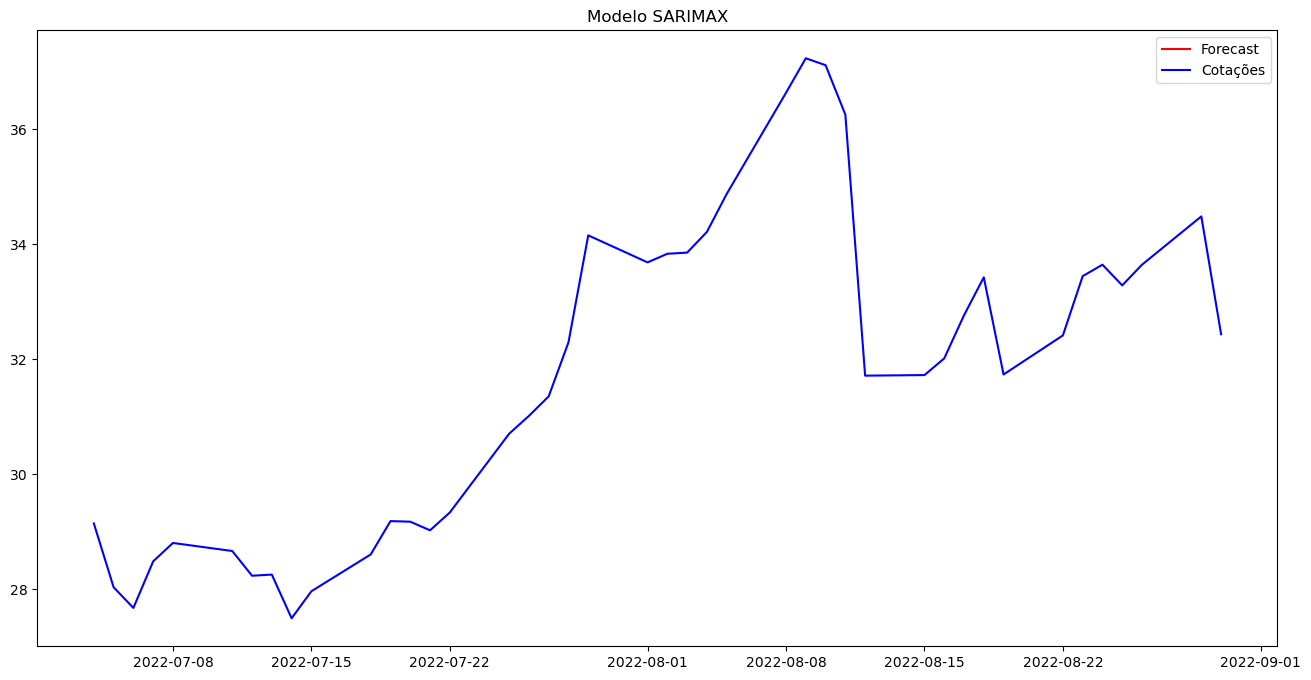

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

plt.figure(figsize = (16,8))


pred = pd.Series(sarimax_trade, index = trade.index)

plt.plot(pred,  color = 'red', label = 'Forecast')
plt.plot(trade['PETR4.SA'],color = 'blue', label = 'Cotações')

            
plt.title('Modelo SARIMAX')
plt.legend()
plt.show()

## **Estratégia de investimento**

In [75]:
def ope_trade(cotacao):

    posicao = []
    for t in range(1, n_trade):
        if cotacao[t+1] > cotacao[t] + 0.5:
            posicao.append('compra')
        else:
            posicao.append('venda')
    
    return posicao

posicao_trade = ope_trade(sarimax_pred)
posicao_trade

['venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda',
 'venda']

## **Avaliando o lucro**

Vamos utilizar a função `balancete` para calcular o lucro das operações na base de *trade* utilizando as predições fornecidas pelo modelo SARIMAX.

In [76]:
def balancete(posicao, cotacao_real, investimento, vlr_inicial):

    balanco = 0
    
    for t in range(1, n_trade-1):
        if posicao[t] == 'venda':
            balanco += cotacao_real[t] -vlr_inicial
        else:
            investimento += cotacao_real[t]
    
    montante = investimento + balanco
    return round((montante/investimento)*100, 2)



In [77]:
balancete(posicao_trade, trade['PETR4.SA'], 1000, 29.14)

110.47